# <center>Organizaci&oacute;n de Datos 75.06/95.58</center>
## <center>Trabajo Practico N°1</center>
### <center> Grupo 25</center>

# Carga de librerías

In [315]:
!pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [316]:
#Agregamos librerias a utilizar
import numpy as np 
import pandas as pd
import sklearn as sk
pd.set_option('display.max_columns', None)

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



# Carga de datos

Cargamos el dataset desde el repositorio y mostramos los primeros 5 registros

In [317]:
dataset_original=pd.read_csv("https://drive.google.com/uc?export=download&id=1DE8k1c_BCcQEfElE9vs8o6QgVj6CACIG")
dataset_original.head(5)

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        1                     2       1       0.0       0   
1                        0                     1       2       0.0       0   
2                        0                     1       2       2.0       0   
3                        2                     5       2       0.0       0   
4                        2                     5       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     USA      Online TA                TA/TO                  0   
1   BB     PRT         Groups               Direct                  0   
2   BB     CHE      Online TA                TA/TO                  0   
3   BB     PRT         Groups                TA/TO                  0   
4   BB     FRA  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  D   
1                       0                               0                  A   
2                       0                               0                  F   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  D                0   No Deposit    9.0      NaN   
1                  A                0   No Deposit    NaN      NaN   
2                  F                0   No Deposit    9.0      NaN   
3                  A                0   Non Refund  154.0      NaN   
4                  A                0   No Deposit   20.0      NaN   

   days_in_waiting_list    customer_type    adr  required_car_parking_spaces  \
0                     0        Transient  115.5                            0   
1                     0        Transient   42.0                            1   
2                     0        Transient  229.0                            0   
3                     0        Transient   75.0                            0   
4                     0  Transient-Party   75.0                            0   

   total_of_special_requests reservation_status_date  \
0                          1              2016-08-25   
1                          0              2015-11-01   
2                          2              2016-10-14   
3                          0              2016-11-29   
4                          1              2017-03-26   

                                     id  is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689            1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1            0  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c            0  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff            1  
4  28c75445-c603-413a-babf-ad377018b592            0

# Analisis Básico

Obtenemos las caracteristicas basicas del data set: Tamaño (Filas y columnas) y tipo de dato por columna

In [318]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Dado que nuestra *target* variable es **is_canceled** verificamos que nuestro dataset este balanceado con cantidades significativas de todos los casos.

In [319]:
dataset_original["is_canceled"].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

La variable **is_canceled** es binaria y notamos iguales cantidades de 0 y 1 por lo que podemos avanzar.

Calculamos valores basicos de las variables cuantitativas (media, mediana, moda, desvío estandar, y cuantiles 0.25, 0.5, 0.75) con el metodo .describe()


In [320]:
dataset_original.describe(include=[np.number])

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       is_repeated_guest  previous_cancellations  \
count       61913.000000            61913.000000   
mean            0.027991                0.114790   
std             0.164948                0.993723   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    61913.000000     61913.000000  54023.000000   
mean                         0.115420         0.195952     84.541010   
std                          1.396359         0.610519    109.523772   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     12.000000   
75%                          0.000000         0.000000    208.000000   
max                         70.000000        17.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  3152.000000          61913.000000  61913.000000   
mean    188.539340              2.638977    102.383773   
std     129.457025             18.619092     47.757640   
min       9.000000              0.000000     -6.380000   
25%      67.000000              0.000000     70.000000   
50%     179.000000              0.000000     95.000000   
75%     270.000000              0.000000    126.000000   
max     543.000000            391.000000    510.000000   

       required_car_parking_spaces  total_of_special_requests   is_canceled  
count                 61913.000000               61913.000000  61913.000000  
mean                      0.049957                   0.523703      0.499750  
std                       0.221023                   0.775412      0.500004  
min                       0.000000                   0.000000      0.000000  
25%                       0.000000                   0.000000      0.000000  
50%                       0.000000                   0.000000      0.000000  
75

Realizamos mismo analisis para variables cualitativas, obteniendo la cantidad de elementos unicos, el elemento más frecuente y la cantidad de veces que se muestra en el dataset.

In [321]:
dataset_original.describe(include = [object])

hotel arrival_date_month   meal country market_segment  \
count        61913              61913  61913   61692          61913   
unique           2                 12      5     149              8   
top     City Hotel             August     BB     PRT      Online TA   
freq         42129               7176  47837   27950          29269   

       distribution_channel reserved_room_type assigned_room_type  \
count                 61913              61913              61913   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  51849              45134              40007   

       deposit_type customer_type reservation_status_date  \
count         61913         61913                   61913   
unique            3             4                     915   
top      No Deposit     Transient              2015-10-21   
freq          51685         47449                    1013   

                                          id  
count                                  61913  
unique                                 61913  
top     7aa4cc6b-b92c-4061-b21d-4f9e0cac4689  
freq                                       1

En la proxima celda decidimos eliminar completamente la columna de la *id* dado que es información irrelevante para el analisis que buscamos hacer ya que cada id es unica y corresponde a la identificación de la reserva.

In [322]:
dataset = dataset_original.drop("id",axis = 1)

Para un primer analisis de las variables buscamos la relación entre las mismas con .corr()

In [323]:
matriz_corr = dataset.corr()
matriz_corr

lead_time  arrival_date_year  \
lead_time                        1.000000           0.023186   
arrival_date_year                0.023186           1.000000   
arrival_date_week_number         0.134793          -0.540542   
arrival_date_day_of_month       -0.006937           0.002326   
stays_in_weekend_nights          0.059463           0.027066   
stays_in_week_nights             0.140110           0.040803   
adults                           0.110942           0.026576   
children                        -0.046058           0.059412   
babies                          -0.022872          -0.013745   
is_repeated_guest               -0.108033          -0.004587   
previous_cancellations           0.094634          -0.142232   
previous_bookings_not_canceled  -0.068102           0.027109   
booking_changes                 -0.019736           0.027285   
agent                           -0.078786           0.081634   
company                          0.150773           0.243066   
days_in_waiting_list             0.166423          -0.058523   
adr                             -0.094559           0.217409   
required_car_parking_spaces     -0.113772          -0.011620   
total_of_special_requests       -0.122760           0.107899   
is_canceled                      0.293816           0.019923   

                                arrival_date_week_number  \
lead_time                                       0.134793   
arrival_date_year                              -0.540542   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057730   
stays_in_weekend_nights                         0.014127   
stays_in_week_nights                            0.012200   
adults                                          0.025886   
children                                        0.006355   
babies                                          0.016215   
is_repeated_guest                              -0.022037   
previous_cancellations                          0.045530   
previous_bookings_not_canceled                 -0.023897   
booking_changes                                 0.012086   
agent                                          -0.043968   
company                                        -0.040886   
days_in_waiting_list                            0.019328   
adr                                             0.075427   
required_car_parking_spaces                     0.001424   
total_of_special_requests                       0.029283   
is_canceled                                     0.008357   

                                arrival_date_day_of_month  \
lead_time                                       -0.006937   
arrival_date_year                                0.002326   
arrival_date_week_number                         0.057730   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.015518   
stays_in_week_nights                            -0.026449   
adults                                           0.002449   
children                                         0.013991   
babies                                           0.002568   
is_repeated_guest                               -0.005230   
previous_cancellations                          -0.034516   
previous_bookings_not_canceled                  -0.002026   
booking_changes                                  0.009522   
agent                                            0.002600   
company                                          0.049011   
days_in_waiting_list                             0.027754   
adr                                              0.033695   
required_car_parking_spaces                      0.000295   
total_of_special_requests                        0.007744   
is_canceled                                     -0.007371   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.059463        

Para entender mejor la información de la matriz podemos generar un heatmap

<Axes: >

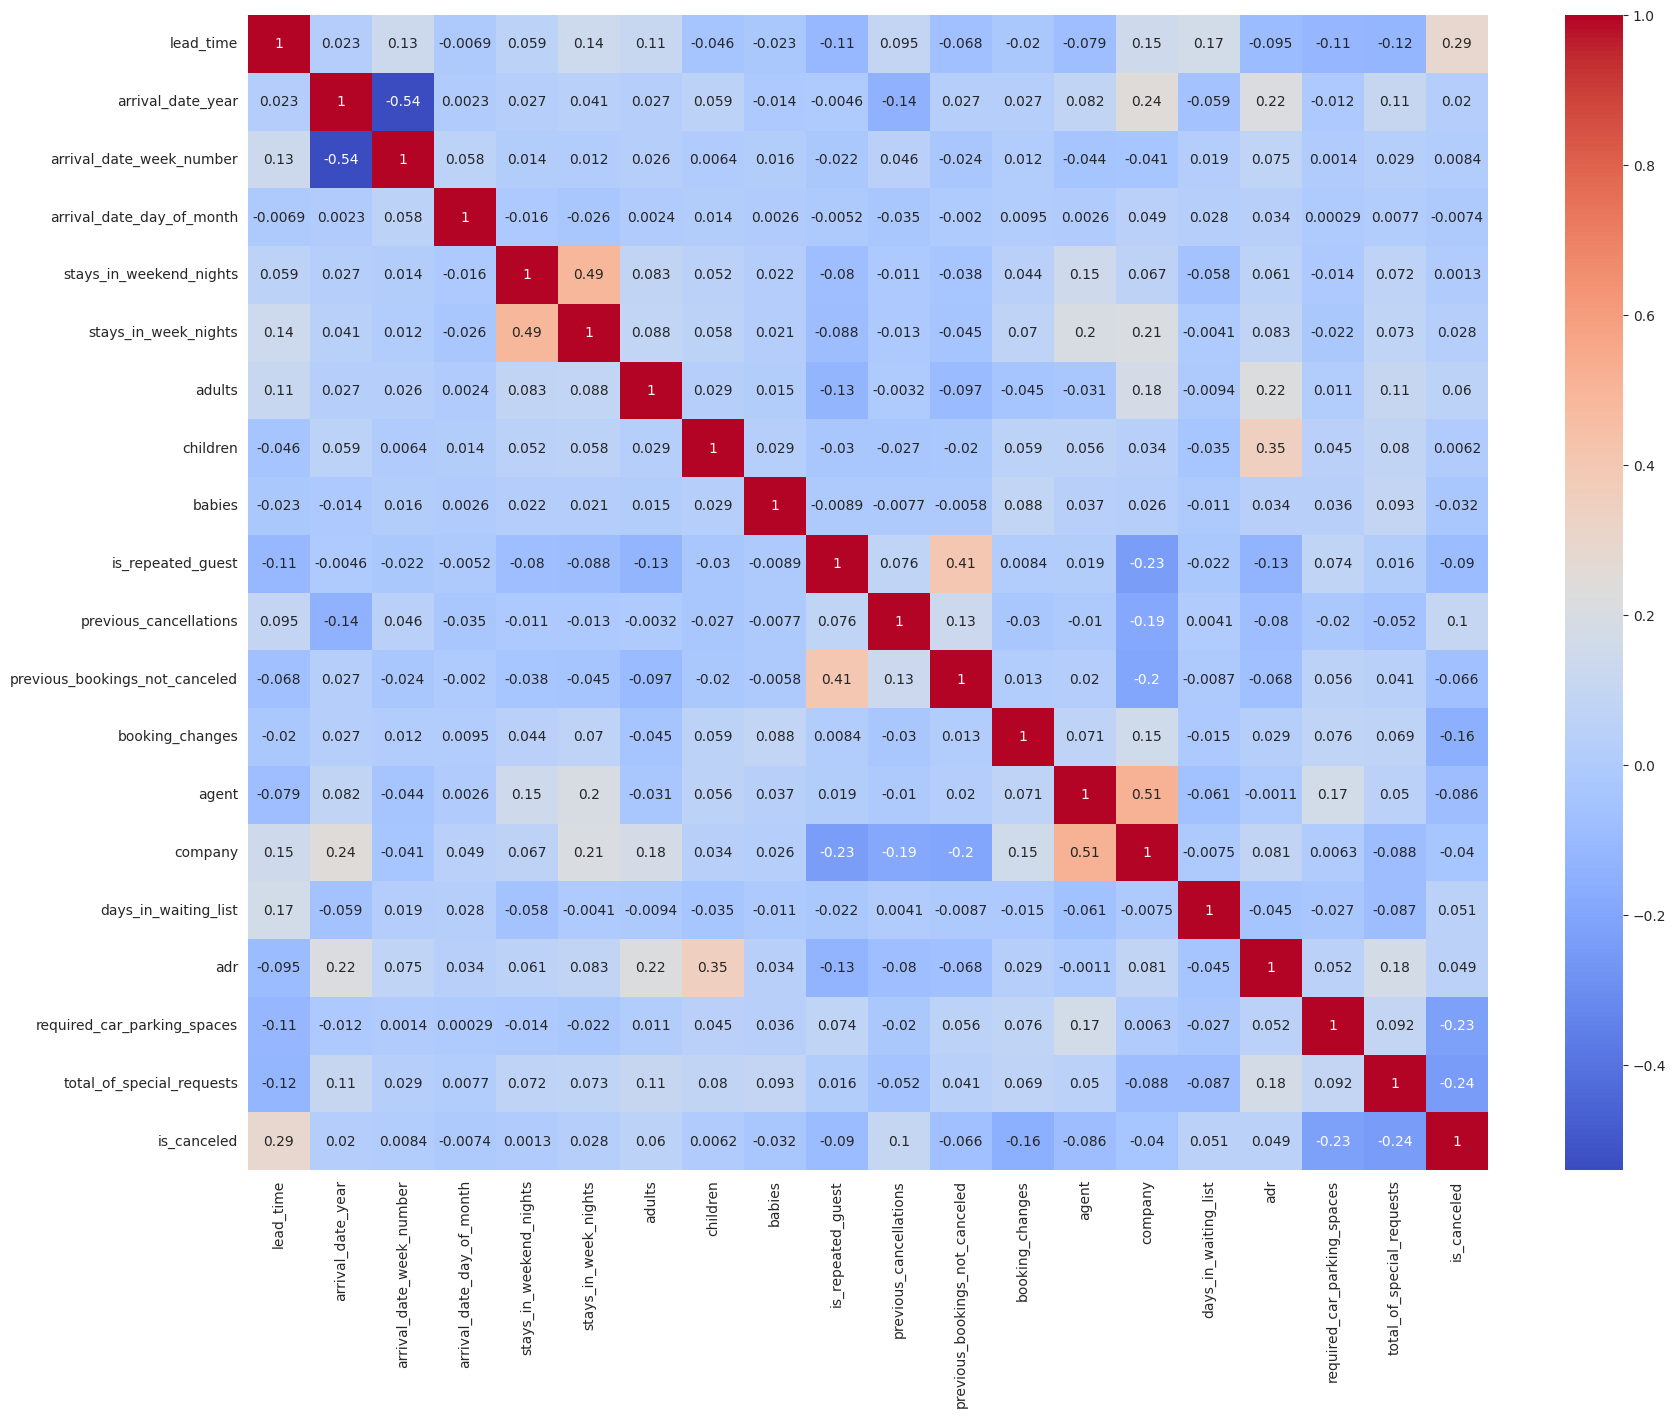

In [324]:
plt.figure(figsize = (20,15))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Podemos analizar la relacion con la variable *target* y ordenarla para observar las variables más significativas.

In [325]:
dataset.corrwith(dataset["is_canceled"]).sort_values()

total_of_special_requests        -0.244997
required_car_parking_spaces      -0.225915
booking_changes                  -0.159315
is_repeated_guest                -0.090492
agent                            -0.086176
previous_bookings_not_canceled   -0.065868
company                          -0.040010
babies                           -0.032034
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
children                          0.006242
arrival_date_week_number          0.008357
arrival_date_year                 0.019923
stays_in_week_nights              0.028439
adr                               0.049206
days_in_waiting_list              0.050827
adults                            0.060179
previous_cancellations            0.099613
lead_time                         0.293816
is_canceled                       1.000000
dtype: float64

Del anterior codigo podemos notar que aquellas variables cuantitativas que mayor correlación poseen con nuestra *target* son por un lado positivamente **lead_time** y negativamente **total_of_special_requests**. Sin embargo ambos valores siguen siendo en modulo relativamente bajos por lo que podemos decir que no tienen una fuerte correlación.
En los siguientes graficos veremos la distribución para cada uno

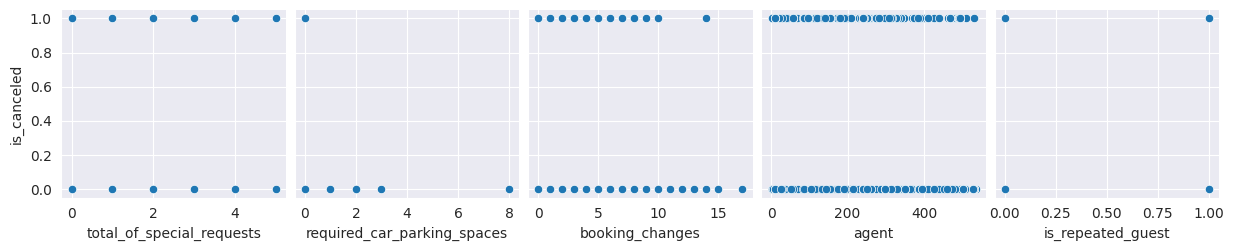

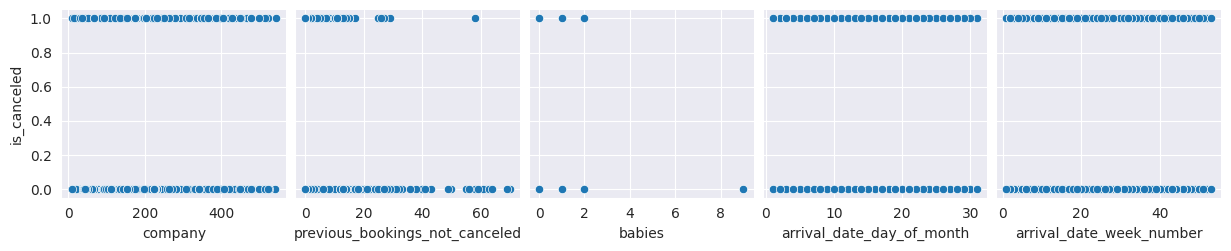

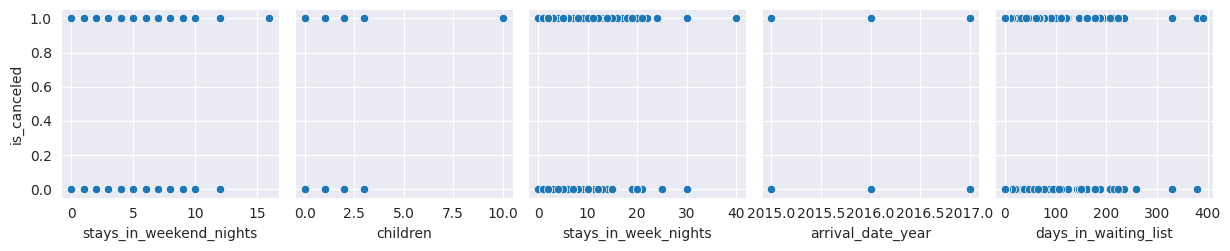

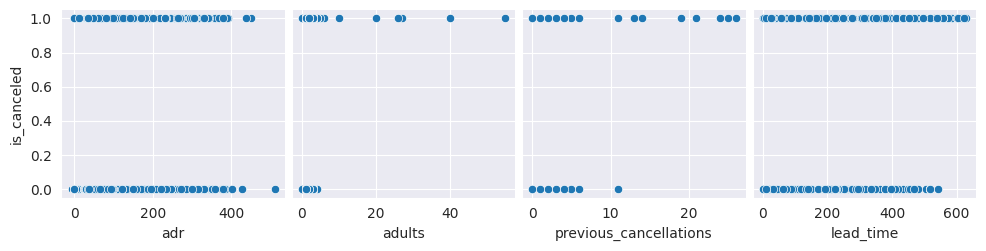

In [326]:
# Dividimos las variables a graficar en grupos de 4/5 para así ubicarlas en distintos gráficos y que se aprecien mejor
x_vars1 = ["total_of_special_requests", "required_car_parking_spaces", "booking_changes", "agent", "is_repeated_guest"]
x_vars2 = ["company", "previous_bookings_not_canceled", "babies", "arrival_date_day_of_month", "arrival_date_week_number"]
x_vars3 = ["stays_in_weekend_nights", "children", "stays_in_week_nights", "arrival_date_year", "days_in_waiting_list"]
x_vars4 = ["adr", "adults", "previous_cancellations", "lead_time"]
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars1)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars2)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars3)
sns.pairplot(dataset, y_vars = ["is_canceled"], x_vars = x_vars4)

Visualmente, podemos observar que, como nos indicaban los coeficientes de correlación de cada variable con ***is_canceled***, son pocas las relaciones que podemos encontrar de nuestro ***target*** respecto al resto de variables numéricas.

In [327]:
def plot_percnt( column_name):
  ct = pd.crosstab(dataset[column_name], dataset['is_canceled'])
  ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
  ct_norm = ct_norm.reset_index()
  return ct_norm

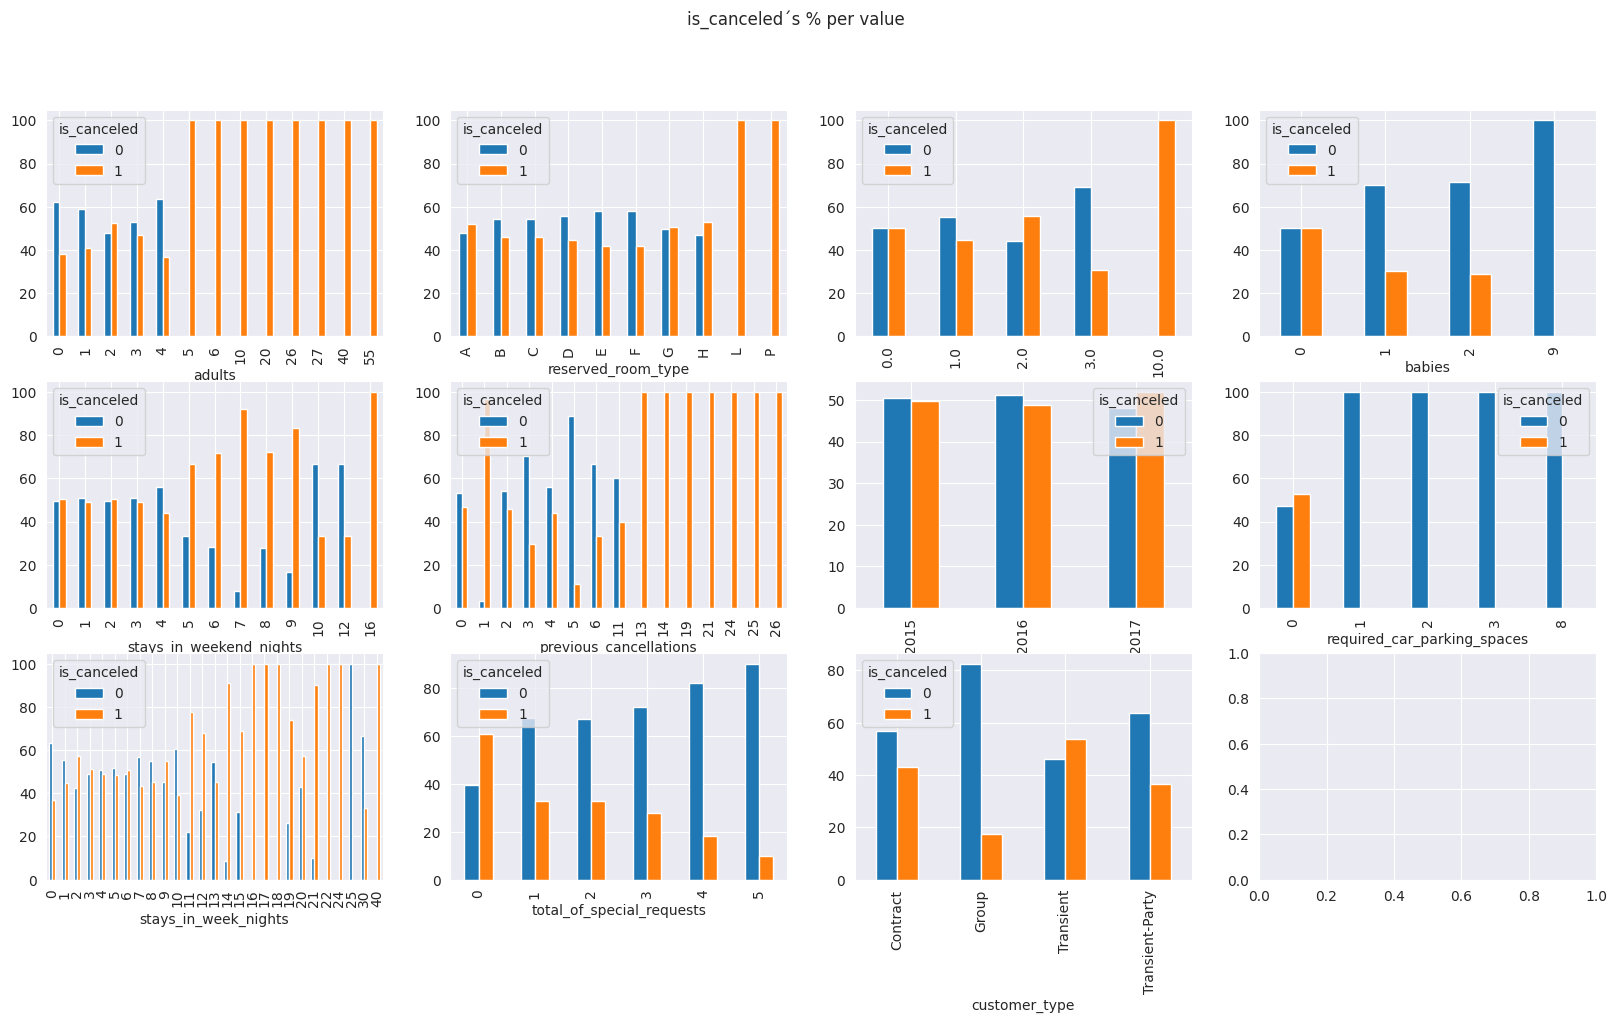

In [328]:
fig1, ax = plt.subplots(3,4,figsize=(20,10))


plot_percnt("adults").plot(kind='bar', ax=ax[0,0], x = "adults")
plot_percnt("reserved_room_type").plot(kind='bar', ax=ax[0,1], x = "reserved_room_type")
plot_percnt("children").plot(kind='bar', ax=ax[0,2], x = "children")
plot_percnt("babies").plot(kind='bar', ax=ax[0,3], x = "babies")

plot_percnt("stays_in_weekend_nights").plot(kind='bar', ax=ax[1,0], x = "stays_in_weekend_nights")
plot_percnt("previous_cancellations").plot(kind='bar', ax=ax[1,1], x = "previous_cancellations")
plot_percnt("arrival_date_year").plot(kind='bar', ax=ax[1,2], x = "arrival_date_year")
plot_percnt("required_car_parking_spaces").plot(kind='bar', ax=ax[1,3], x = "required_car_parking_spaces")

plot_percnt("stays_in_week_nights").plot(kind='bar', ax=ax[2,0], x = "stays_in_week_nights")
plot_percnt("total_of_special_requests").plot(kind='bar', ax=ax[2,1], x = "total_of_special_requests")
plot_percnt("customer_type").plot(kind='bar', ax=ax[2,2], x = "customer_type")


fig1.suptitle("is_canceled´s % per value")
plt.show()

Text(0.5, 1.0, "is_canceled´s '1's % for country")

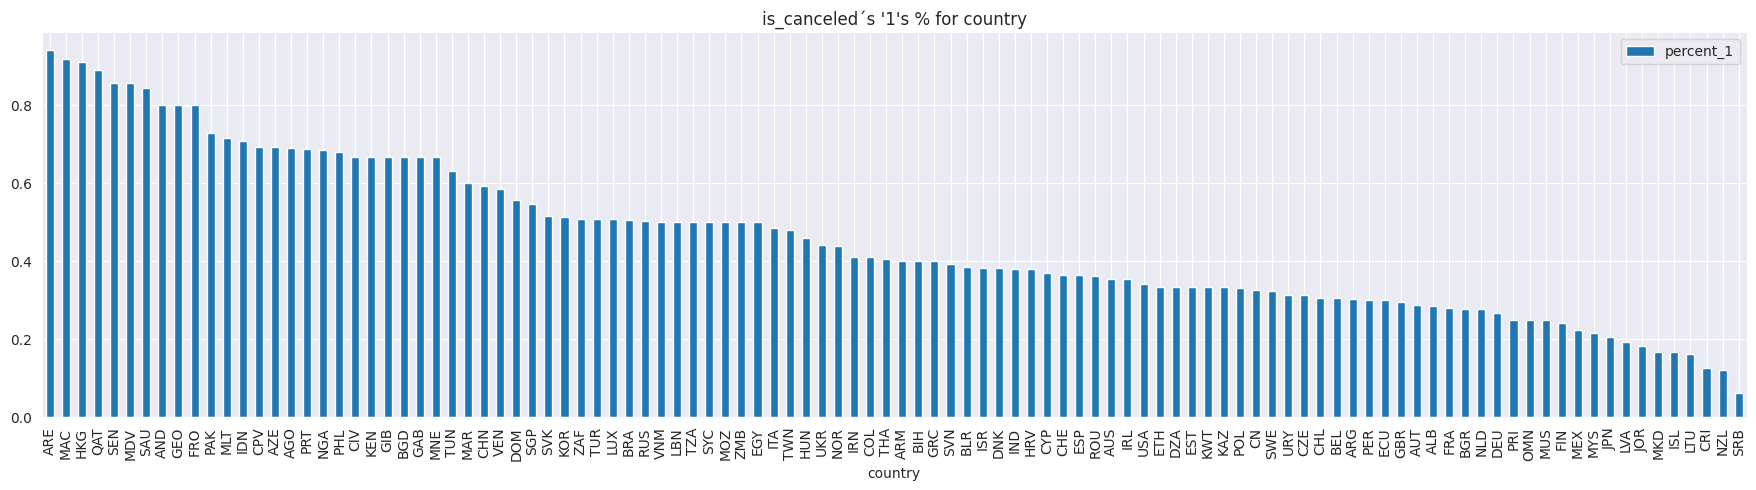

In [329]:
# Agrupamos los datos por "country" y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby('country')['is_canceled'].value_counts()

# Convertimos la serie resultado a un dataframe y renombramos la columna 
cancel_df = cancel_counts.to_frame(name='counts')

# Resetamos el index para hacer a "country" y a "is_canceled" en columnas
cancel_df = cancel_df.reset_index()

cancel_pivot = cancel_df.pivot(index='country', columns='is_canceled', values='counts')

# Calculamos el porcentaje de 1 en la columna "is_canceled" por cada country 
cancel_pivot['percent_1'] = cancel_pivot[1] / (cancel_pivot[0] + cancel_pivot[1])

# Ordenamos el dataframe por porcentaje de 1s en orden descendiente 
cancel_pivot_sorted = cancel_pivot.sort_values(by='percent_1', ascending=False)
cancel_pivot_sorted = cancel_pivot_sorted.reset_index()
ax = cancel_pivot_sorted[cancel_pivot_sorted["percent_1"] > 0].plot(kind = "bar", x = "country", y="percent_1", figsize= (22,5))
plt.title("is_canceled´s '1's % for country")

Text(0.5, 1.0, "is_canceled´s '1's % for market segments")

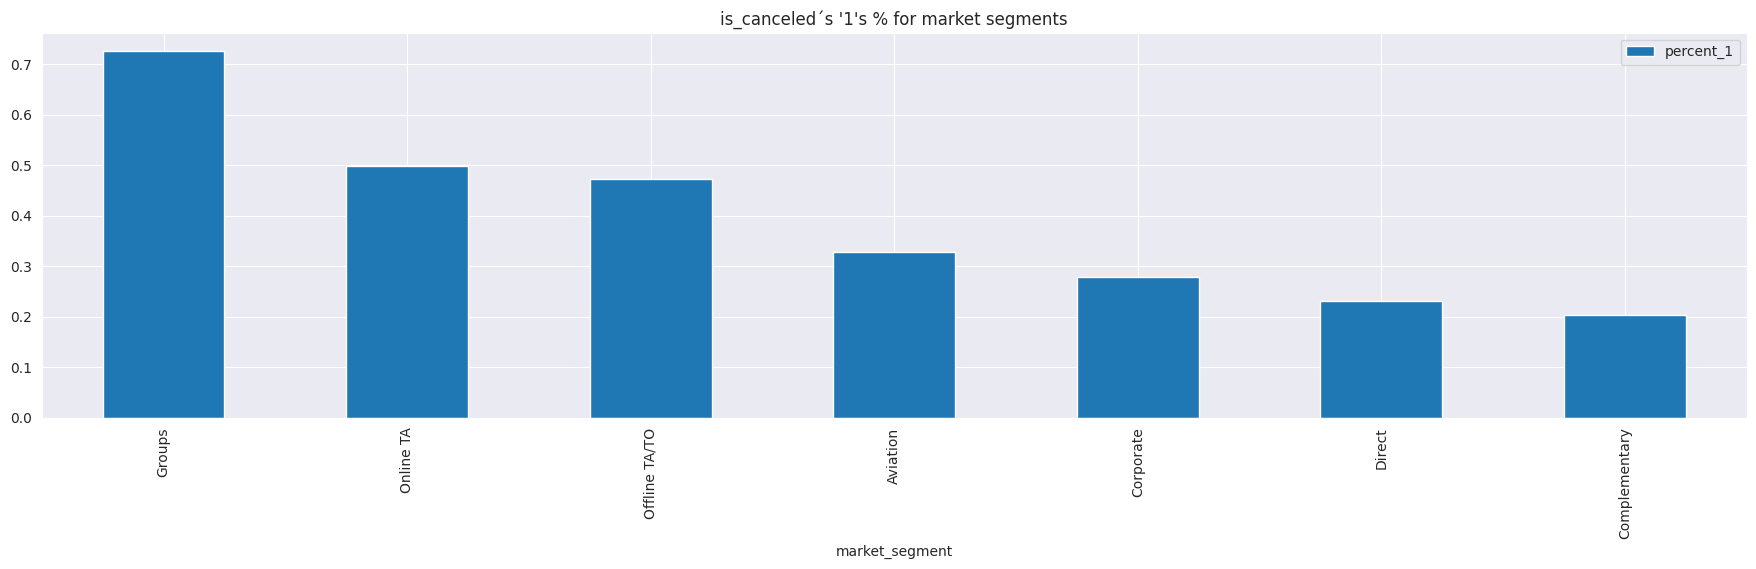

In [330]:
# Agrupamos los datos por "market_segment" y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby('market_segment')['is_canceled'].value_counts()

# Convertimos la serie resultado a un dataframe y renombramos la columna 
cancel_df = cancel_counts.to_frame(name='counts')

# Resetamos el index para hacer a "market_segment" y a "is_canceled" en columnas
cancel_df = cancel_df.reset_index()

cancel_pivot = cancel_df.pivot(index='market_segment', columns='is_canceled', values='counts')

# Calculamos el porcentaje de 1 en la columna "is_canceled" por cada "market_segment" 
cancel_pivot['percent_1'] = cancel_pivot[1] / (cancel_pivot[0] + cancel_pivot[1])

# Ordenamos el dataframe por porcentaje de 1s en orden descendiente 
cancel_pivot_sorted = cancel_pivot.sort_values(by='percent_1', ascending=False)
cancel_pivot_sorted = cancel_pivot_sorted.reset_index()
ax = cancel_pivot_sorted[cancel_pivot_sorted["percent_1"] > 0].plot(kind = "bar", x = "market_segment", y="percent_1", figsize= (22,5))
plt.title("is_canceled´s '1's % for market segments")

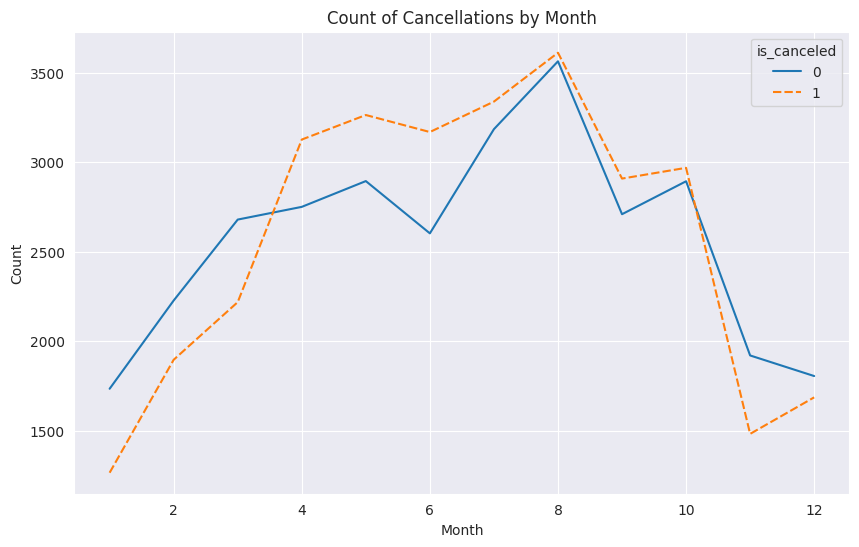

In [331]:
# Creamos un diccionario para asignar a los meses un valor numerico 
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Agregamos una nueva columna con un valor numerico para cada mes
dataset['month_num'] = dataset['arrival_date_month'].map(month_map)

#Ordenamos el dataframe por la nueva columna de valores numericos
dataset = dataset.sort_values('month_num')

# Agrupamos los datos por mes y la columna "is_canceled", contamos las ocurrencias de cada valor
cancel_counts = dataset.groupby(['month_num', 'is_canceled'])['is_canceled'].count()

# Convertimos la serie resultante en un daraframe y resetamos el indice 
cancel_df = cancel_counts.to_frame(name='count').reset_index()

# Filtramos el dataframe para incluir solo las filas en las que "is_canceled" es 0 o 1. 
cancel_df = cancel_df[cancel_df['is_canceled'].isin([0, 1])]

cancel_pivot = cancel_df.pivot(index='month_num', columns='is_canceled', values='count')

# Mostramos en un lineplot los 0s y 1s de "is_canceled" por cada mes 
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=cancel_pivot)
plt.title('Count of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

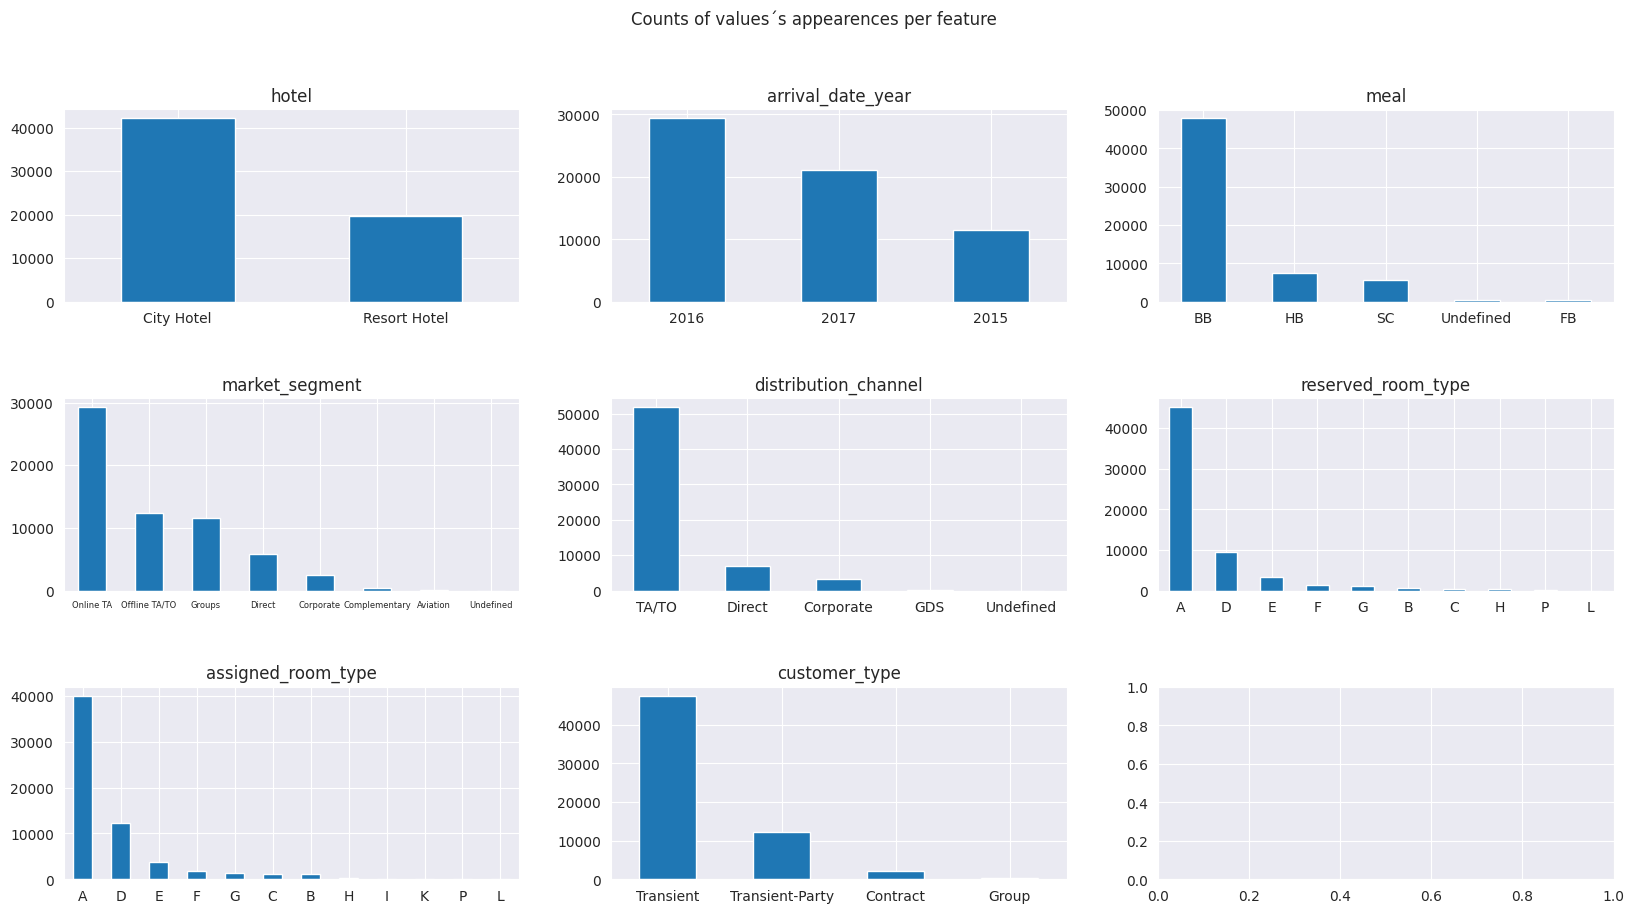

In [332]:
object_columns = list(["hotel", "arrival_date_year", "meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "customer_type"])

n_cols = len(object_columns)
n_rows = int(n_cols / 3) + (n_cols % 3 > 0)
fig, axes = plt.subplots(nrows = n_rows, ncols=3, figsize=(20, 10),gridspec_kw={'hspace': 0.5})

for i, col in enumerate(object_columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = dataset[col].value_counts().plot(kind="bar",ax=axes[row_idx, col_idx])
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    if i == 3:
      ax.tick_params(axis='x', which='major', labelsize=6)

fig.suptitle("Counts of values´s appearences per feature")
plt.show()

# Limpieza de datos


Para comenzar la limpieza de datos, buscaremos manejar los valores nulos dentro de nuestro dataset

In [333]:
filas_totales = dataset.shape[0]
na_percnt = dataset.isna().sum()/filas_totales*100
na_percnt.to_frame()

0
hotel                            0.000000
lead_time                        0.000000
arrival_date_year                0.000000
arrival_date_month               0.000000
arrival_date_week_number         0.000000
arrival_date_day_of_month        0.000000
stays_in_weekend_nights          0.000000
stays_in_week_nights             0.000000
adults                           0.000000
children                         0.006461
babies                           0.000000
meal                             0.000000
country                          0.356952
market_segment                   0.000000
distribution_channel             0.000000
is_repeated_guest                0.000000
previous_cancellations           0.000000
previous_bookings_not_canceled   0.000000
reserved_room_type               0.000000
assigned_room_type               0.000000
booking_changes                  0.000000
deposit_type                     0.000000
agent                           12.743689
company                         94.908985
days_in_waiting_list             0.000000
customer_type                    0.000000
adr                              0.000000
required_car_parking_spaces      0.000000
total_of_special_requests        0.000000
reservation_status_date          0.000000
is_canceled                      0.000000
month_num                        0.000000

Notamos que solamente 4 columnas tienen valores nulos, estas son *children*, *country*, *agent* y *company*. Además, en dos de ellas (*children* y *country*), sus valores porcentuales son considerablemente bajos, mientras que en las otras dos (*agent* y *company*) ya hay valores que no pueden obviarse. Para visualizarlo mejor armemos un *bar graph* con los porcentajes de valores nulos de las cuatro variables.

<Axes: title={'center': 'Non-available values %'}, ylabel='%'>

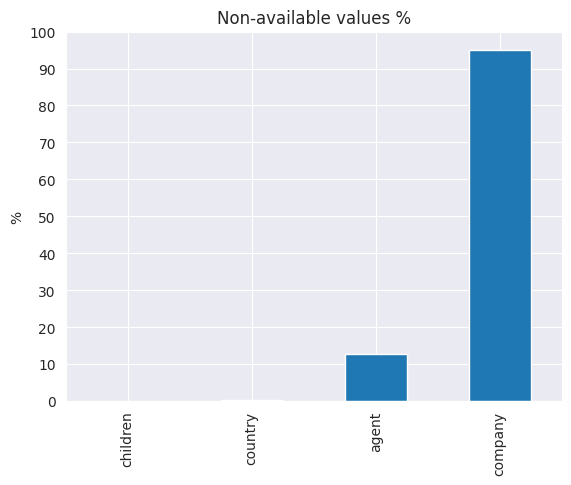

In [334]:
#Creamos una lista con los valores a graficar
values_to_graph = na_percnt.get(["children", "country", "agent", "company"])
values_to_graph.plot.bar(ylabel = "%", yticks = range(0, 101, 10), title = "Non-available values %")

Podemos observar que los porcentaje de valores *'non-available'* tanto para *children* como para *country* son practicamente nulos, sin embargo, los de *agent* y *company* ya escalan a un nivel superior, siendo en *company* por poco la totalidad de los valores 'NA'.

Para *children* decidimos remplazar los valores por 0 ya que es el valor más frecuente y además solamente falta el 0.006461% por lo que es insignificante.
Luego, para *country*, *agent* y *company* en el paper aclara que no existen *missing values* y que debemos interpretarlos como *“not applicable”* por lo que decidimos en cada caso crear una categoria nueva.

In [335]:
children_old = dataset["children"]
country_old = dataset["country"]
agent_old = dataset["agent"].astype(object)
company_old = dataset["company"].astype(object)

dataset["children"].fillna(0, inplace = True)
dataset["country"].fillna("NC",inplace = True)
dataset["agent"].fillna(-1,inplace = True)
dataset["company"].fillna(-1,inplace = True)
dataset["agent"] = dataset["agent"].astype(int).astype(str)
dataset["company"] = dataset["company"].astype(int).astype(str)

In [336]:
dataset["agent"].replace("-1", 'NA')
dataset["company"].replace("-1", 'NC')
dataset["children"] = dataset["children"].astype(int)

Ahora comparemos la distribución de las variables antes y después de la imputación. Para eso a las variables no numéricas (*country*, *agent* y *company*) hay que transformarlas a valores que puedan ser comparables entre si. Para esto usaremos el *OrdinalEncoder*.

In [337]:
print(pd.concat([agent_old,company_old,country_old],axis=1).describe())
print(dataset.describe(include = [object])[["agent","company","country"]])

          agent  company country
count   54023.0   3152.0   61913
unique    296.0    276.0     150
top         9.0     40.0     PRT
freq    17004.0    390.0   27950
        agent company country
count   61913   61913   61913
unique    297     277     150
top         9      -1     PRT
freq    17004   58761   27950


Nuevamente, las diferencias las encontramos en las variables *agent* y *company* para el caso de los conteos, en particular con *company* en donde cambia el valor de mayor apariciones (antes era -1, osea 'NA') con su respectiva frecuencia

# Análisis de Valores Atípicos

### Análisis Univariado

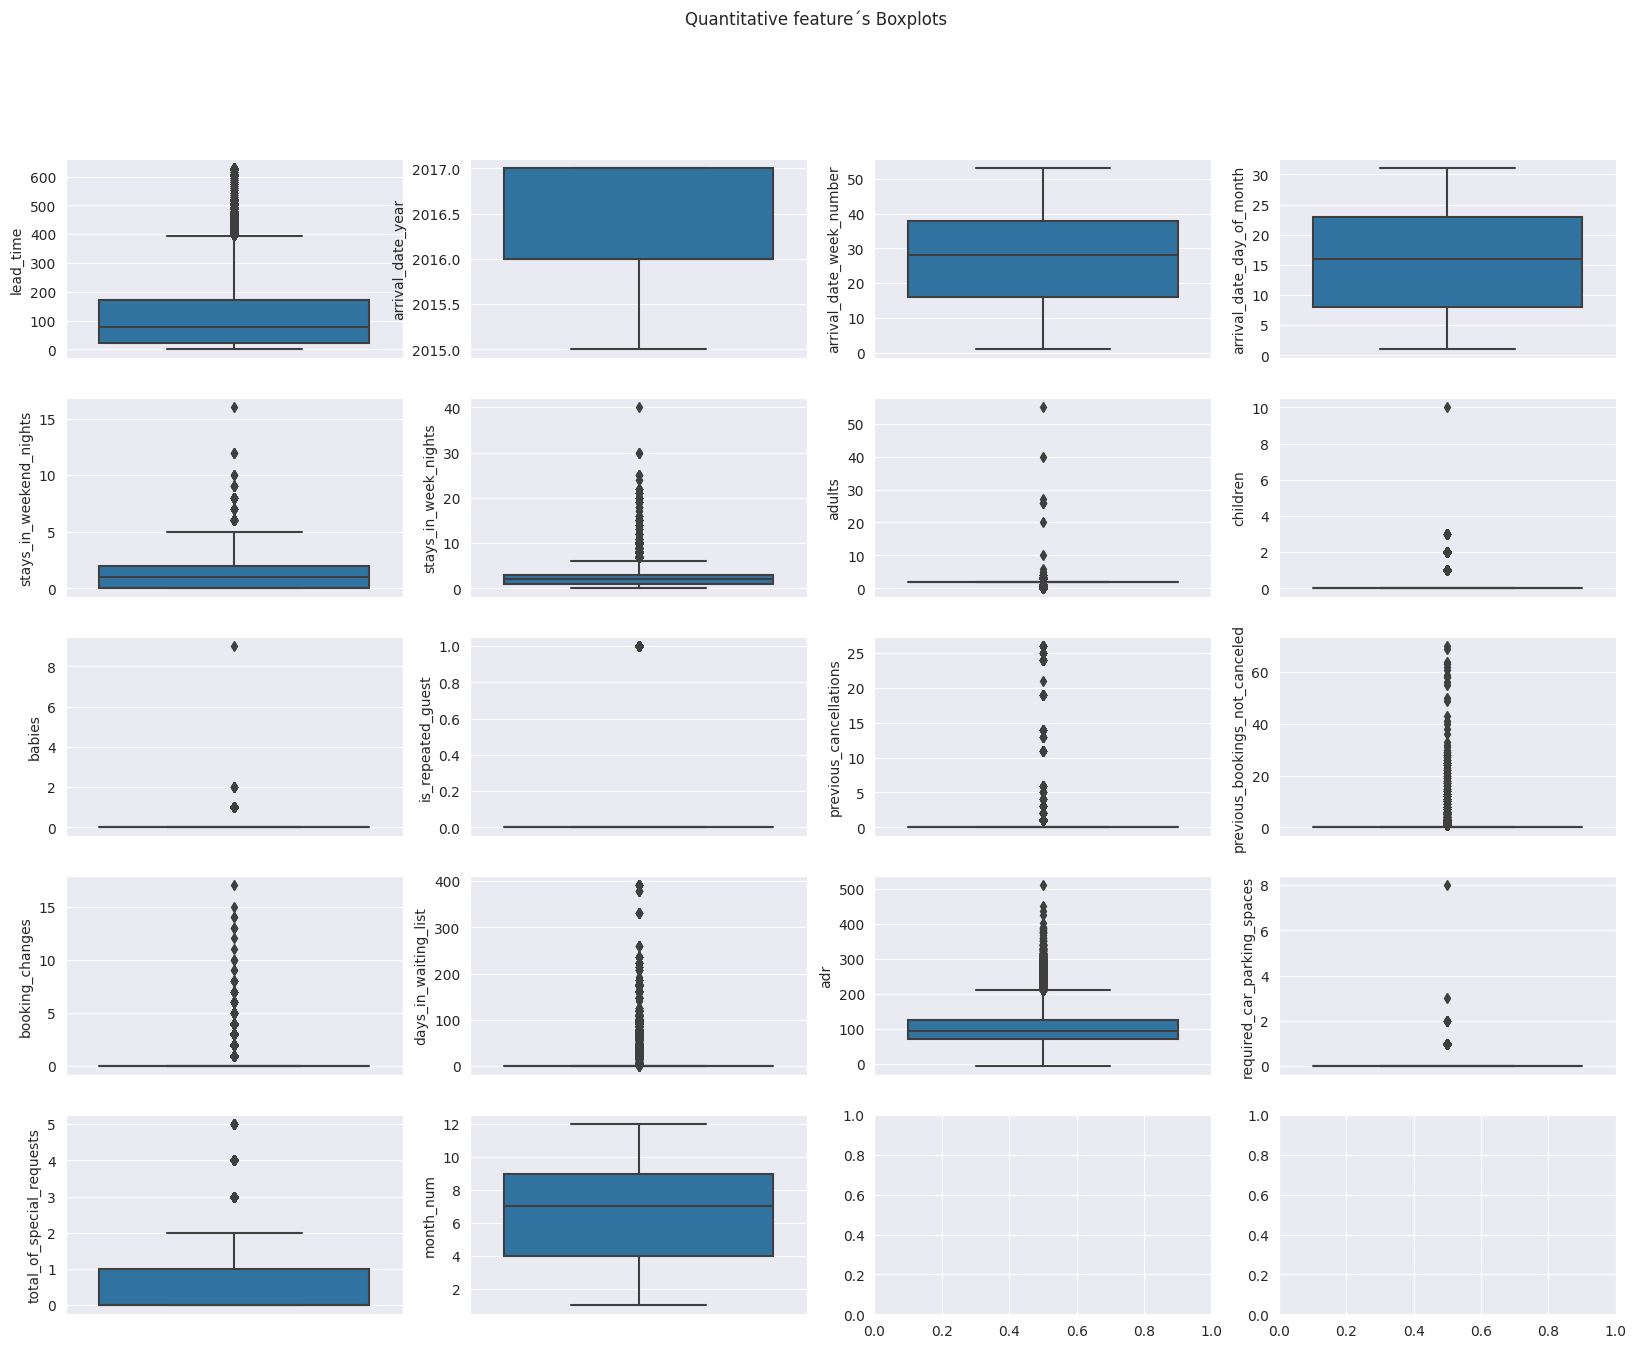

In [338]:
fig1, axes = plt.subplots(5,4,figsize=(20,15))
columns_types = dataset.dtypes
cantidad = 0
iqr = []
outs_sup = []
outs_inf = []
columns = []
z_score = pd.DataFrame()
for column in dataset:
  if column != 'is_canceled' and (columns_types[column] == "float64" or columns_types[column] == "int64"):
    columns.append(column)
    sns.boxplot(y = dataset[column], ax= axes[cantidad//4,cantidad-4*(cantidad//4)])
    cantidad += 1

    #Cuartiles
    Q1 = np.quantile(dataset[column],0.25)
    Q3 = np.quantile(dataset[column],0.75)

    #Rango intercuartil
    IQR = Q3 - Q1

    #Limite superior Outliers
    out_sup = Q3 + 3*IQR
    out_inf = Q1 - 3*IQR
    iqr.append(IQR)
    outs_sup.append(out_sup)
    outs_inf.append(out_inf)

    meadian = np.mean(dataset[column])
    MAD=np.mean(np.absolute((dataset[column]-meadian)))
    z_score[column]=(dataset[column] - meadian)*0.6745/MAD

fig1.suptitle("Quantitative feature´s Boxplots")
plt.show()

In [339]:
boxplots_values = pd.DataFrame({ "columns": columns,"IQR": iqr, "outliers sup": outs_sup, "outliers inf": outs_inf})
boxplots_values = boxplots_values.set_index("columns").transpose()
boxplots_values

columns       lead_time  arrival_date_year  arrival_date_week_number  \
IQR               149.0                1.0                      22.0   
outliers sup      619.0             2020.0                     104.0   
outliers inf     -424.0             2013.0                     -50.0   

columns       arrival_date_day_of_month  stays_in_weekend_nights  \
IQR                                15.0                      2.0   
outliers sup                       68.0                      8.0   
outliers inf                      -37.0                     -6.0   

columns       stays_in_week_nights  adults  children  babies  \
IQR                            2.0     0.0       0.0     0.0   
outliers sup                   9.0     2.0       0.0     0.0   
outliers inf                  -5.0     2.0       0.0     0.0   

columns       is_repeated_guest  previous_cancellations  \
IQR                         0.0                     0.0   
outliers sup                0.0                     0.0   
outliers inf                0.0                     0.0   

columns       previous_bookings_not_canceled  booking_changes  \
IQR                                      0.0              0.0   
outliers sup                             0.0              0.0   
outliers inf                             0.0              0.0   

columns       days_in_waiting_list    adr  required_car_parking_spaces  \
IQR                            0.0   56.0                          0.0   
outliers sup                   0.0  294.0                          0.0   
outliers inf                   0.0  -98.0                          0.0   

columns       total_of_special_requests  month_num  
IQR                                 1.0        5.0  
outliers sup                        4.0       24.0  
outliers inf                       -3.0      -11.0

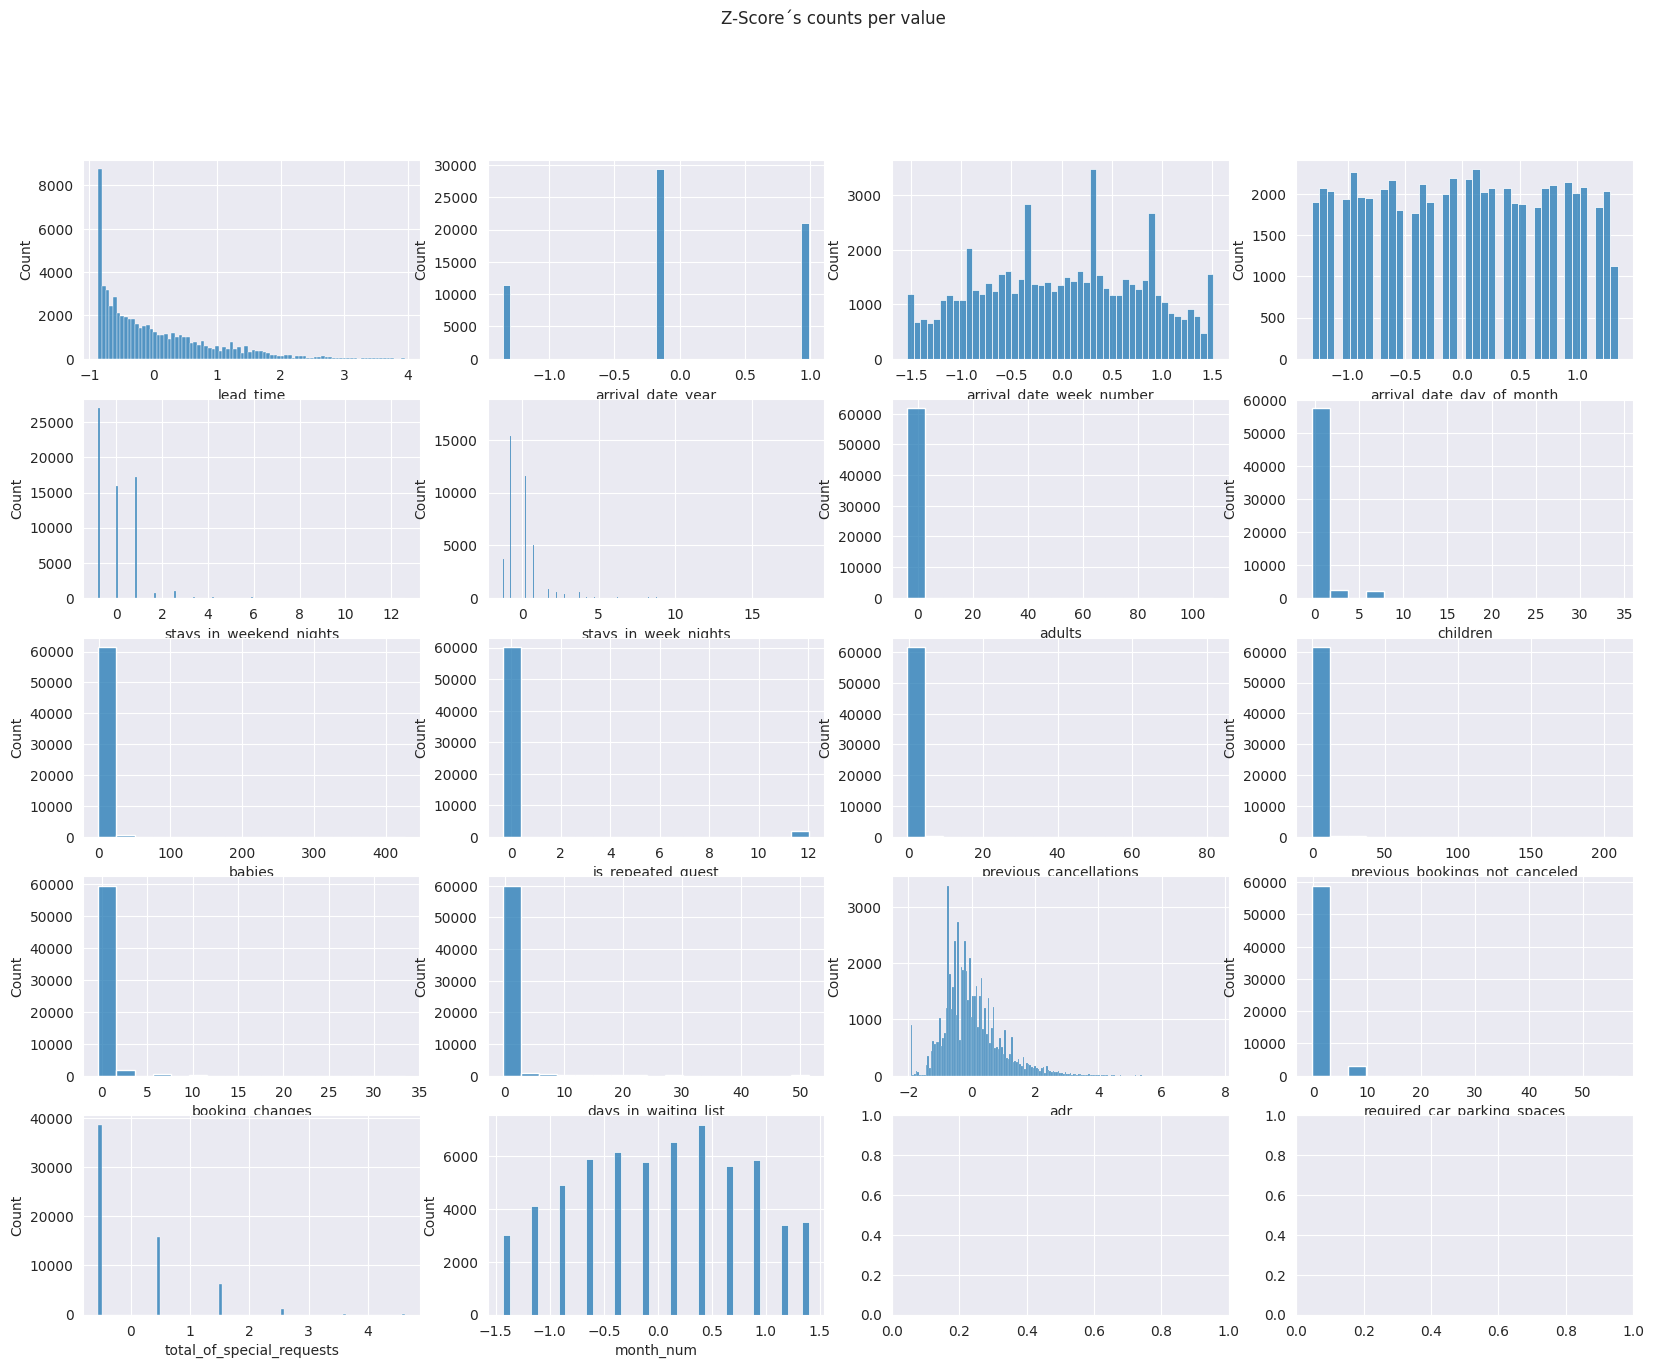

In [340]:
z_score.sort_index()
fig1, ax = plt.subplots(5,4,figsize=(20,15))
cantidad = 0
for column in z_score:
  sns.histplot(z_score[column], ax = ax[cantidad//4,cantidad-4*(cantidad//4)])
  cantidad += 1

fig1.suptitle("Z-Score´s counts per value")
plt.show()

Para el analisis univariado de outliers con el z-score modificado decidimos utilziar como valor limite 3 y -3, para este set de datos ningun registro excede el -3 sin embargo para varias columnas si se supera el limite superior. Procederemos a analizar cada caso, determinando si efectivamente los outliers presentan información significativa.

In [341]:
z_score = z_score.reset_index()
z_score[z_score["babies"] > 3].sort_values("babies")[["babies","index"]]

babies  index
172     47.122044   2705
43041   47.122044   3018
42985   47.122044  16647
42810   47.122044  37535
42779   47.122044  37453
...           ...    ...
11351   94.583685   6675
45935   94.583685  47646
28197   94.583685  50487
33202   94.583685  38639
50692  426.815173  12659

[428 rows x 2 columns]

Podemos notar que si bien hay 428 registros cuyo z-score excede el limite que decidimos para determinar outliers, solamente el último registro tiene sentido pensarlo como extraño ya que para los valores de z-score de 47.12 y 94.58 estamos tratando de 1 y 2 bebes, mientras que el de z-score de 426.81 es de 9 bebes por lo que decidimos eliminarlo del dataset.

In [342]:
dataset = dataset.drop(dataset[dataset["babies"] == 9].index)
dataset[dataset["babies"] == 9]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, is_canceled, month_num]
Index: []

In [343]:
z_score[z_score["required_car_parking_spaces"] > 3].sort_values("required_car_parking_spaces")[["required_car_parking_spaces","index"]]

required_car_parking_spaces  index
11                        6.748370  49059
40971                     6.748370  10091
40972                     6.748370  28003
40980                     6.748370  27926
40995                     6.748370   8771
...                            ...    ...
37950                    13.851597  51270
33549                    13.851597  14389
23041                    13.851597   2168
29383                    20.954824  13713
10842                    56.470958   8269

[3072 rows x 2 columns]

Para el caso de la columna *required_car_parking_spaces* notamos algo similar a babies, si bien hay 3072 filas de potenciales outliers realmente podemos considerar uno solo como outlier por la magnitud del mismo y este es el registro 8269 que para la columna posee un valor de 8. 

In [344]:
dataset = dataset.drop(dataset[dataset["required_car_parking_spaces"] == 8].index)
dataset[dataset["required_car_parking_spaces"] == 8]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, is_canceled, month_num]
Index: []

### Análisis Multivariado

In [345]:
# Cargamos un nuevo dataframe con loas variables cuantitativas
multivariado = pd.DataFrame()
for column in dataset:
  if columns_types[column] == "float64" or columns_types[column] == "int64":
    multivariado[column] = dataset[column]

Busquemos outliers entre dos variables que tengan cierto grado de relación entre si. Para eso usamos los pares de variables:
 - *stays_in_week_nights* - *stays_in_weekend_nights*
 - *lead_time* - *days_in_waiting_list*

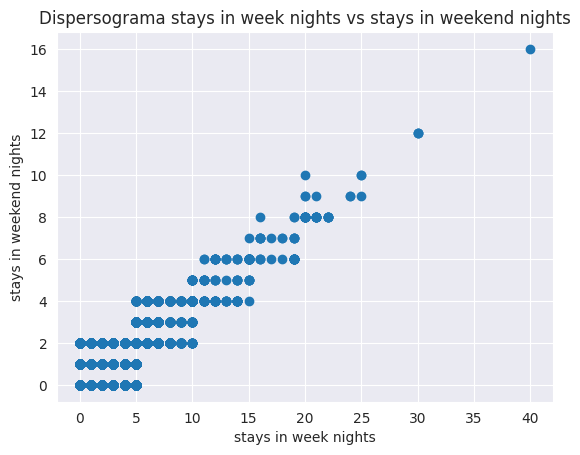

In [346]:
#Scatter Plot
plt.scatter(multivariado["stays_in_week_nights"],multivariado["stays_in_weekend_nights"])
plt.title('Dispersograma stays in week nights vs stays in weekend nights')
plt.xlabel('stays in week nights')
plt.ylabel('stays in weekend nights')
plt.show()

El gráfico nos muestra cierta covarianza entre las variables, lo que tiene sentido si se tiene en cuenta que, por ejemplo, si una persona se queda una semana entera en el hotel, estaría quedandose 5 días en la semana y 2 días en el fin de semana. No se encuentran outliers.

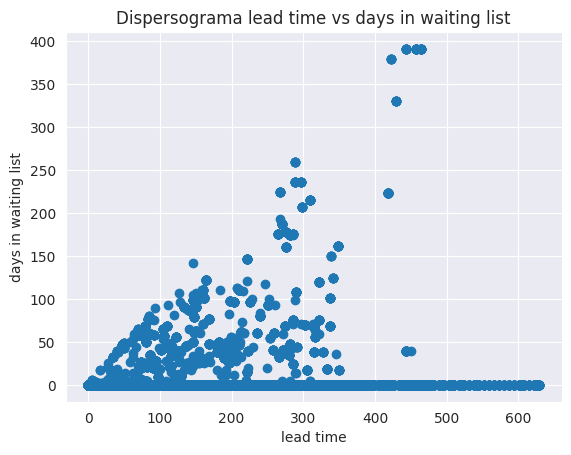

In [347]:
#Scatter Plot
plt.scatter(multivariado["lead_time"],multivariado["days_in_waiting_list"])
plt.title('Dispersograma lead time vs days in waiting list')
plt.xlabel('lead time')
plt.ylabel('days in waiting list')
plt.show()

Este par de variables se encuentran más dispersas que el par anterior, y se encuentran valores que parecen estar aislados del sector de mayor densidad.
Usamos el metodo LOF (Local Outlier Factor) para identificar aquellos posibles outliers que se alejan de éstas zonas de mayor densidad.

In [348]:
from sklearn.neighbors import LocalOutlierFactor

multivariadoLOF = pd.DataFrame({'lead_time': multivariado['lead_time'], 'days_in_waiting_list': multivariado['days_in_waiting_list']})

X = multivariado[['lead_time','days_in_waiting_list']].values

clf = LocalOutlierFactor(n_neighbors=20)
clf.fit(X)
y_pred = clf.fit_predict(X)
scores = clf.negative_outlier_factor_

multivariadoLOF['scores'] = scores

multivariadoLOF.sort_values('scores')

# multivariadoLOF

lead_time  days_in_waiting_list        scores
28696        146                   142 -2.758623e+11
39555        246                   117 -2.175052e+11
29990        249                    20 -2.000000e+11
19224        184                   111 -1.910497e+11
11111        221                   121 -1.338078e+11
...          ...                   ...           ...
27025        545                     0 -9.384874e-01
1583         545                     0 -9.384874e-01
27871        545                     0 -9.384874e-01
39209        545                     0 -9.384874e-01
40742        545                     0 -9.384874e-01

[61911 rows x 3 columns]

<ipython-input-349-e3fc3c518080>:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
<ipython-input-349-e3fc3c518080>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.


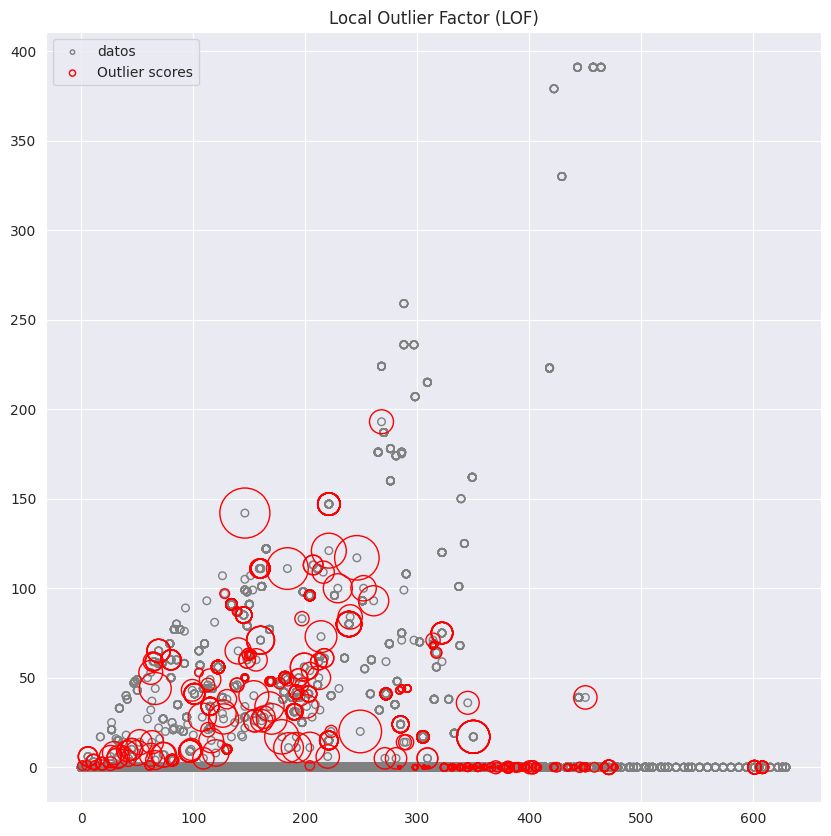

In [349]:
#Calculo radio para plotear score
radius = (multivariadoLOF.scores.max() - multivariadoLOF.scores) / (multivariadoLOF.scores.max() - multivariadoLOF.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(multivariadoLOF.lead_time.values,multivariadoLOF.days_in_waiting_list.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(multivariadoLOF.lead_time.values,multivariadoLOF.days_in_waiting_list.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [350]:
multivariadoLOF[multivariadoLOF['lead_time'] < multivariadoLOF['days_in_waiting_list']]

Empty DataFrame
Columns: [lead_time, days_in_waiting_list, scores]
Index: []

Si bien usando el método se identifican ciertos outliers, como ningun registro contempla un valor mayor en *days_in_waiting_list* que en *lead_time*, son valores posibles y que creemos no deberían eliminarse del dataset.

Analizaremos a continuación la variación frente a la cantidad de adultos de distintas variables

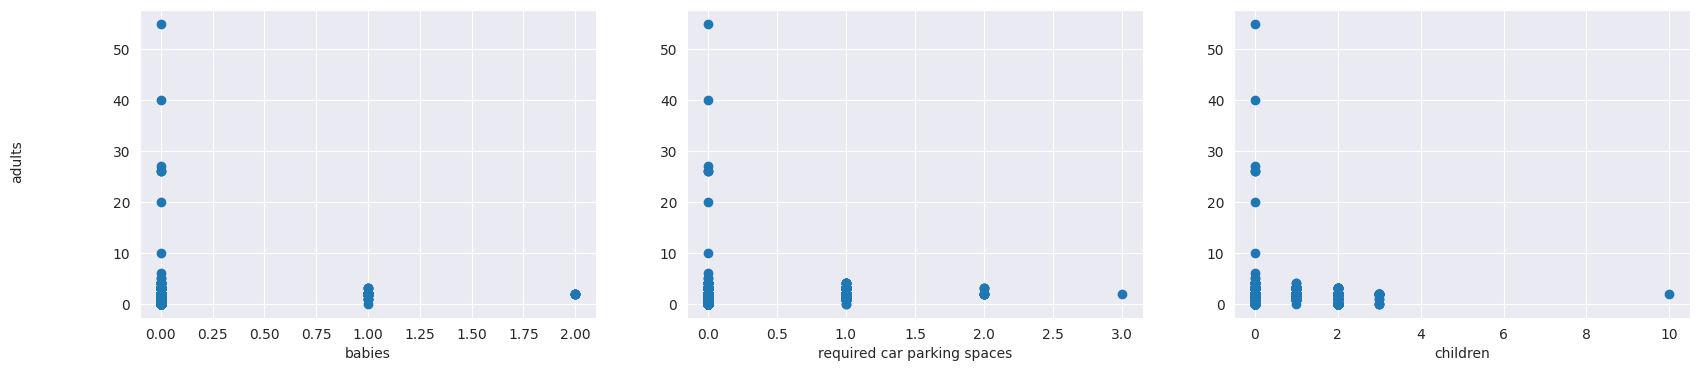

In [351]:
#Scatter Plot
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].scatter(multivariado["babies"],multivariado["adults"])
axs[0].set_xlabel('babies')

axs[1].scatter(multivariado["required_car_parking_spaces"],multivariado["adults"])
axs[1].set_xlabel('required car parking spaces')

axs[2].scatter(multivariado["children"],multivariado["adults"])
axs[2].set_xlabel('children')

fig.text(0.06, 0.5, 'adults', va='center', rotation='vertical')

plt.show()

De los ultimos 3 graficos notamos que al considerar la relación *adults - children*, *adults - babies* y *adults - required car parking spaces*, uno podría esperar que exista una correlación lineal entre ambos ya que un aumento de la cantidad de adultos implica generalmente una aumento en la cantidad de niños y también de autos utilizados. Sin embargo de los graficos podemos observar que esto no sucede y no solo no existe tal relación sino que para muchos casos con 0 adultos tenemos que se solicitaron espacios o que hay reservas para niños sin adultos lo cual nos indica que hubo un problema en la carga de la información

# Arboles de decisión

Para empezar a crear el modelo de arbol de decisión decidimos hacer ciertas modificaciones al dataset. 
Primero creamos una nueva columna llamada "no_company" con el proposito de simplificar la previa columna "company" dada la magnitud de valores nulos que había.
Luego decidimos eliminar aquellas variables que complejizan el analisis para finalmente realizar un "hot encoding" de las variables cualitativas.  

In [352]:
dataset["no_company"] = dataset["company"].apply(lambda x:1 if x=="-1" else 0)
dataset_tree_x = dataset.drop(["company","arrival_date_month","reservation_status_date","is_canceled"],axis = "columns", inplace = False)
dataset_tree_x = pd.get_dummies(dataset_tree_x, columns=["hotel","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"],
                           drop_first=True)

Dada la cantidad de valores unicos de dos de las variables ("agent" y "country") decidimos generar 6 arboles con 3 casos distintos:
+ Sin ninguna de las dos
+ Solo con country
+ Solo con agent

Para cada caso se generaron 2 arboles, uno de baja profundidad ("max_depth" de 5) y otro de mayor profundidad pero podado.

Para cada caso, primero eliminamos las columnas del dataset que no necesitamos, asi como las distintas separaciones para el entrenamiento y testeo, con una relación 70-30 respectivamente. Elegimos inicialmente el criterio de entropia.

In [353]:
def scores (y_test, y_pred):
  accuracy=accuracy_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred,)
  precision=precision_score(y_test,y_pred)
  return [accuracy,recall,f1,precision]

In [354]:
def trees (x_train, x_test, y_train, y_test):
  tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 5, 
                                         min_samples_leaf=10) 
  plt.figure(figsize=(15, 5))
  #Entrenamos el modelo
  model = tree_model.fit(X = x_train, y = y_train)
  y_pred = model.predict(x_test)
  #Creo la matriz de confusión
  tabla=confusion_matrix(y_test, y_pred)
  scores_1 = scores(y_test,y_pred)
  #Grafico la matriz
  plt.subplot(121)
  ax1 = sns.heatmap(tabla,cmap='GnBu', annot=True,  fmt='g')
  ax1.set_title("Matriz para arbol sin poda")
  ax1.set_xlabel('Predicted')
  ax1.set_ylabel('True')

  tree_model_pruned = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=50,
                                         ccp_alpha=0.01) 
  #Entrenamos el modelo
  model_pruned = tree_model_pruned.fit(X = x_train, y = y_train)
  y_pred = model_pruned.predict(x_test)

  #Creo la matriz de confusión
  tabla_2 = confusion_matrix(y_test, y_pred)
  scores_2 = scores(y_test,y_pred)

  #Graficamos la matriz
  plt.subplot(122)
  ax2 = sns.heatmap(tabla_2,cmap='GnBu', annot=True,  fmt='g')
  ax2.set_title("Matriz para arbol con poda")
  ax2.set_xlabel('Predicted')
  ax2.set_ylabel('True')
  plt.show()

  return [model, model_pruned, scores_1, scores_2]


## Arboles sin variables "agent" ni "country"

In [355]:
dataset_x = dataset_tree_x.drop(["agent","country"],axis = "columns", inplace = False)
dataset_y = dataset["is_canceled"].copy() # lo usamos para todos los arboles

x_train, x_test, y_train, y_test = train_test_split(dataset_x,
                                                    dataset_y, 
                                                    test_size=0.3,
                                                    random_state=2)

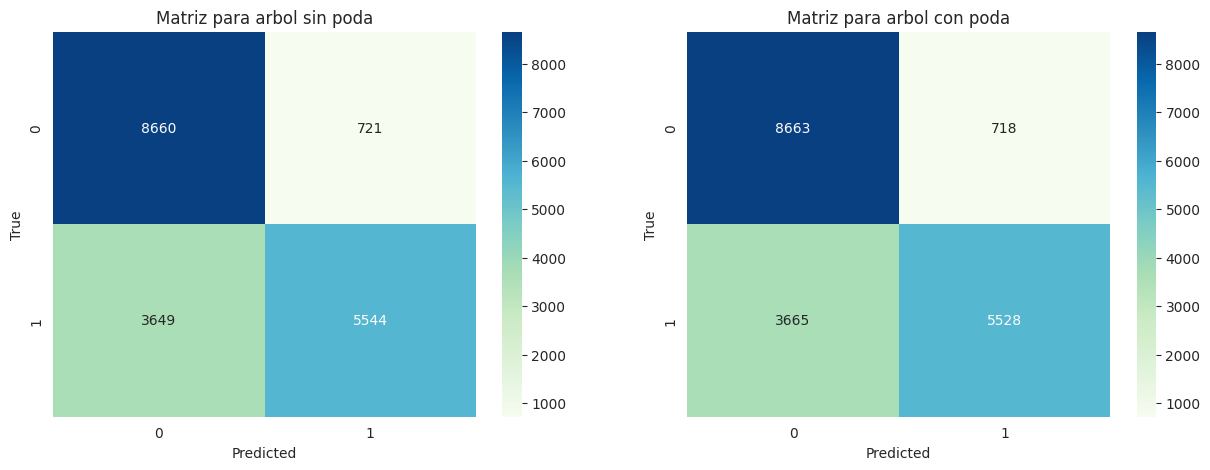

In [356]:
model, model_pruned, scores_1, scores_2 = trees(x_train,x_test,y_train,y_test)

In [357]:
plt.figure(figsize=(100,100))

tree_plot=tree.plot_tree(model_pruned,
                                 feature_names=dataset_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=["Not canceled", "Canceled"]) #model.classes_
plt.show(tree_plot)

## Arboles con variable "country"

In [358]:
dataset_x_with_country = dataset_tree_x.drop(["agent"],axis = "columns", inplace = False)
dataset_x = pd.get_dummies(dataset_x_with_country, columns=["country"], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(dataset_x,
                                                    dataset_y, 
                                                    test_size=0.3,
                                                    random_state=2)

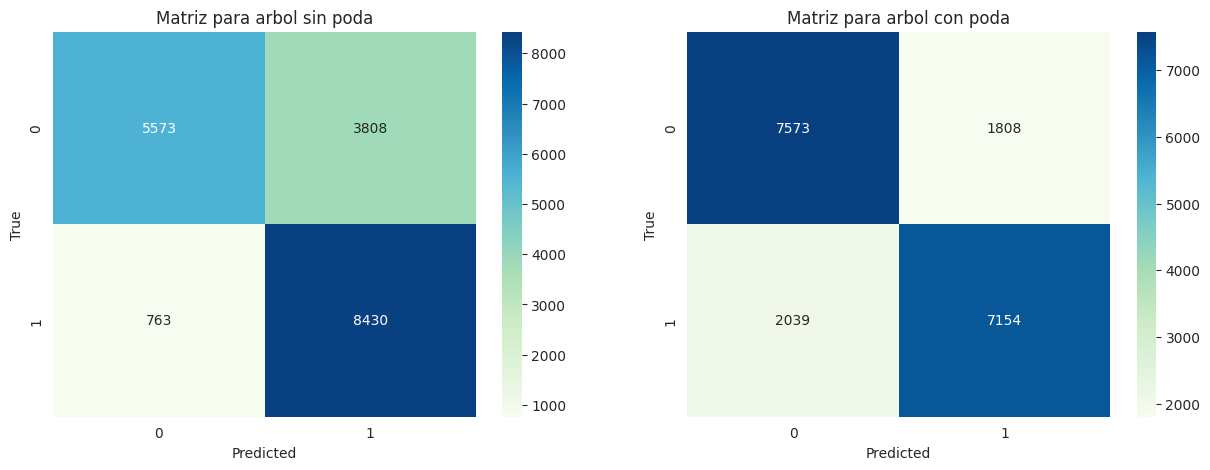

In [359]:
model, model_pruned_def, scores_3 , scores_4 = trees(x_train,x_test,y_train,y_test)

In [360]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model_pruned_def,
                                 feature_names=dataset_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=["Not canceled", "Canceled"]) #model.classes_
plt.show(tree_plot_completo)

In [361]:
# guardamos la importancia de cada variable para analizarla luego
feature_importance = sorted(list(zip(dataset_x.columns.to_list(), model_pruned.feature_importances_)), key=lambda x: -x[1])

## Arboles con variable agent

In [362]:
dataset_x = dataset_tree_x.drop(["country"],axis = "columns", inplace = False)
dataset_x = pd.get_dummies(dataset_x, columns=["agent"], drop_first=True)
dataset_y = dataset["is_canceled"].copy()

x_train, x_test, y_train, y_test = train_test_split(dataset_x,
                                                    dataset_y, 
                                                    test_size=0.3,
                                                    random_state=2)

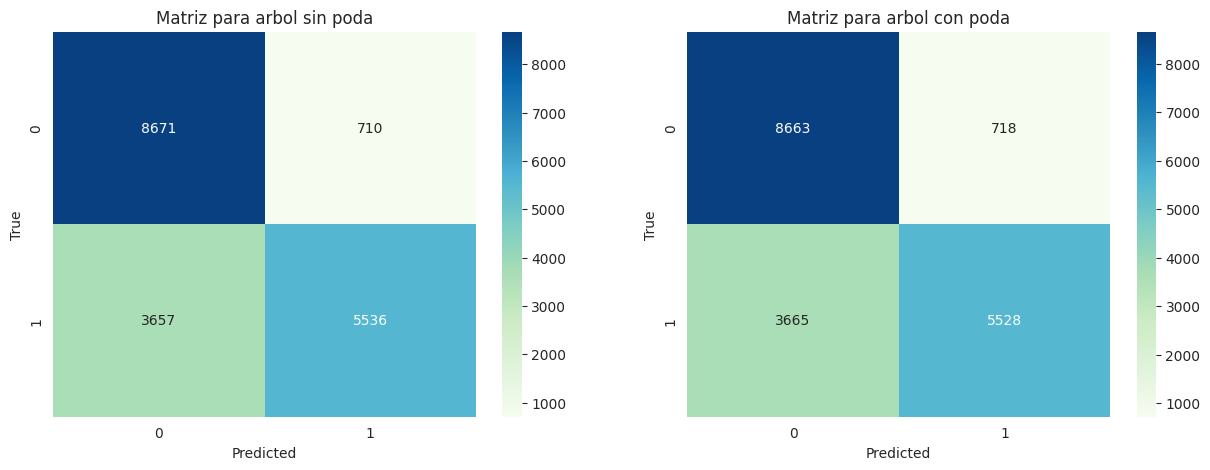

In [363]:
model, model_pruned, scores_5, scores_6 = trees(x_train,x_test,y_train,y_test)

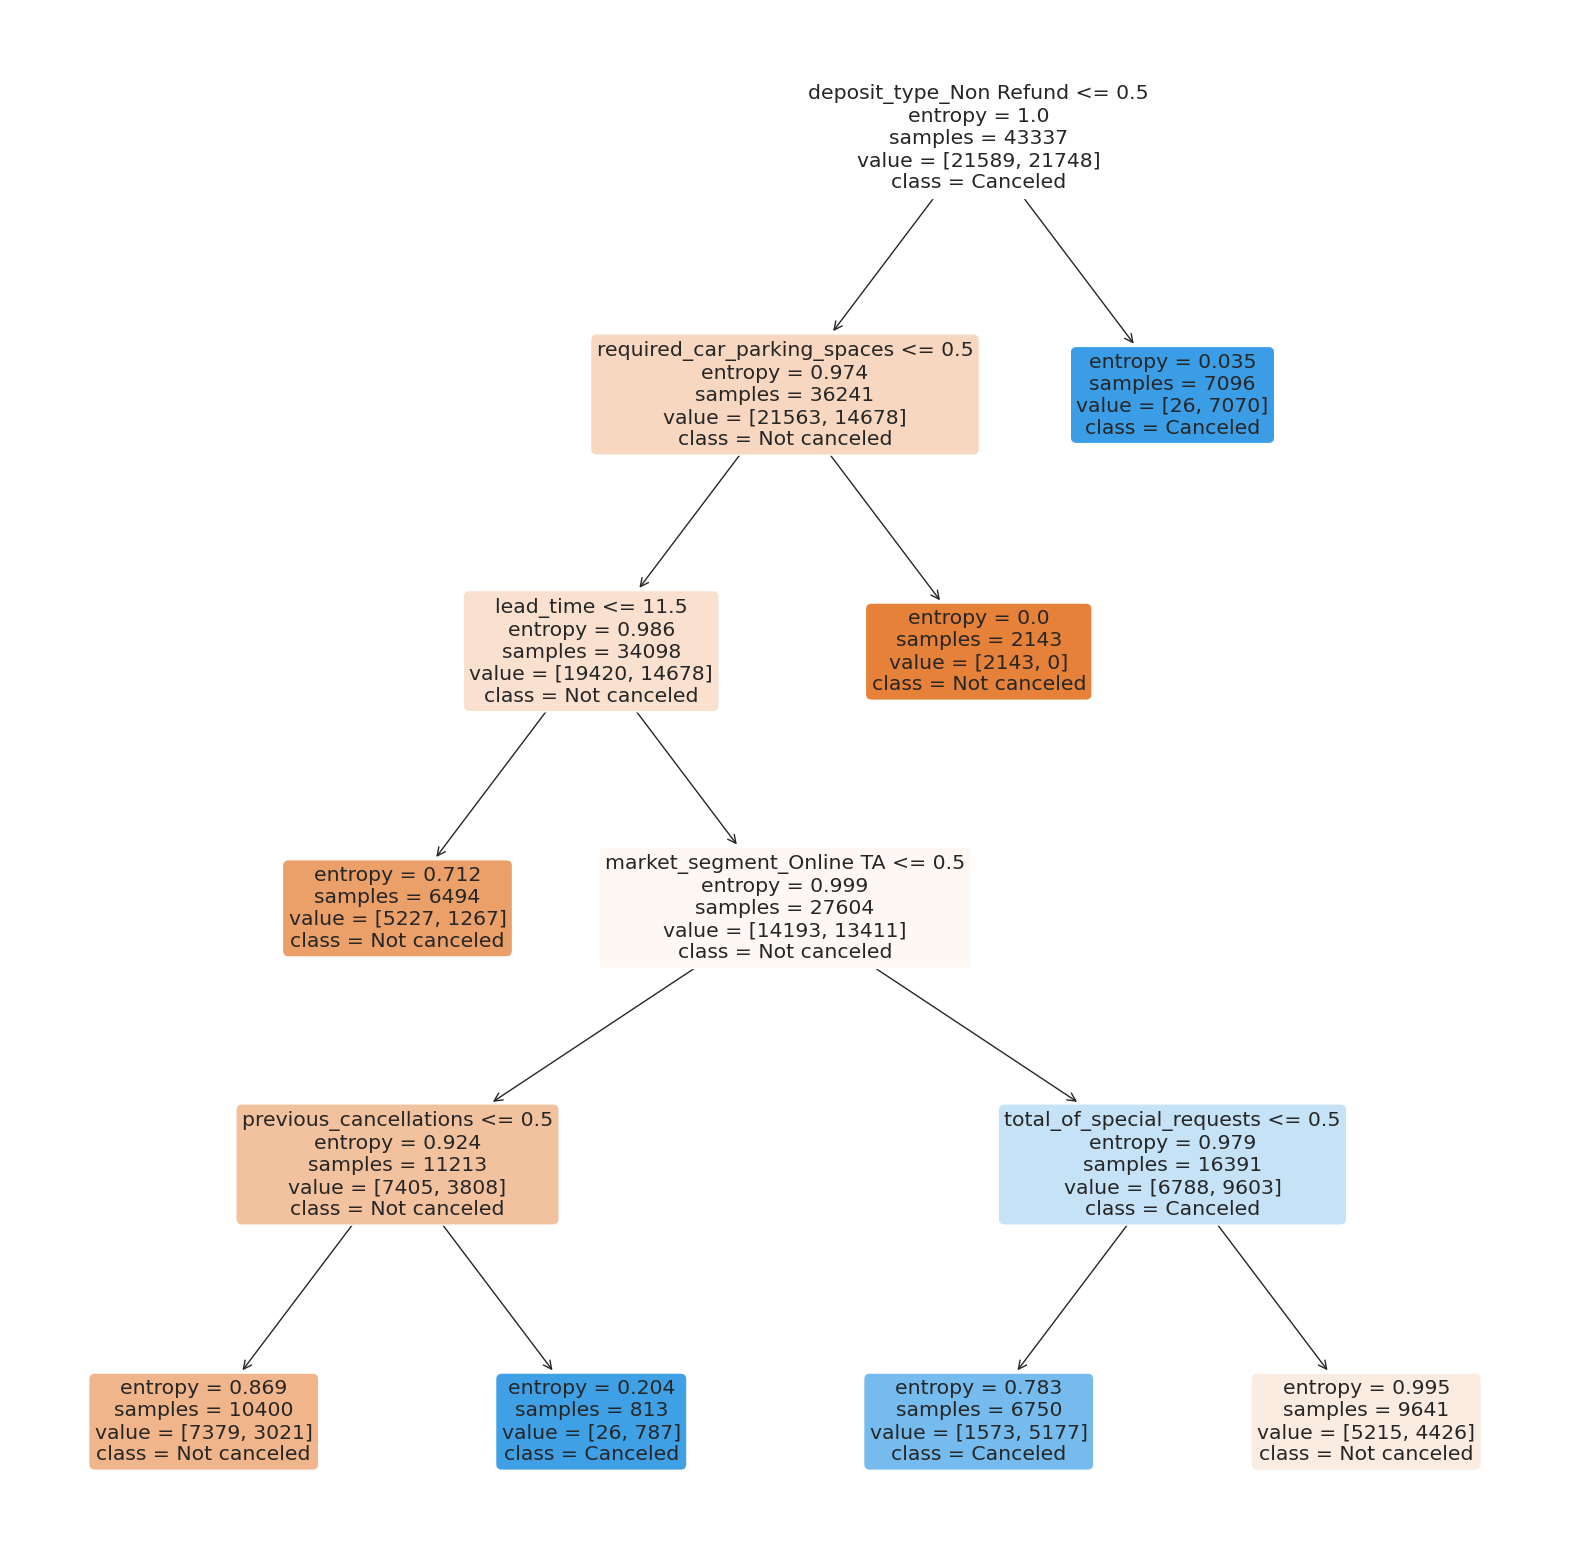

In [364]:
plt.figure(figsize=(20,20))

tree_plot_completo=tree.plot_tree(model_pruned,
                                 feature_names=dataset_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=["Not canceled", "Canceled"]) #model.classes_
plt.show(tree_plot_completo)

## Analisis de scores

In [365]:
scores = [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]
scores_df = pd.DataFrame(scores, index = ["No agent No country", "No agent No country pruned", "No agent with country", "No agent with country pruned", "With agent no country", "With agent no country pruned"],
                         columns = ["accuracy","recall","f-score","precision"])
scores_df["score mean"] = scores_df.mean(axis=1)
scores_df

accuracy    recall   f-score  precision  \
No agent No country           0.764725  0.603068  0.717298   0.884916   
No agent No country pruned    0.764025  0.601327  0.716109   0.885046   
No agent with country         0.753903  0.917002  0.786711   0.688838   
No agent with country pruned  0.792883  0.778201  0.788102   0.798259   
With agent no country         0.764886  0.602197  0.717145   0.886327   
With agent no country pruned  0.764025  0.601327  0.716109   0.885046   

                              score mean  
No agent No country             0.742502  
No agent No country pruned      0.741627  
No agent with country           0.786614  
No agent with country pruned    0.789361  
With agent no country           0.742639  
With agent no country pruned    0.741627

## Busqueda de hiperparametros

Observando los score obtenidos de los 6 arboles generados decidimos quedarnos con el "No agent with country pruned", no solo porque tiene la mejor media en score, sino que dado que consideramos que el f-score es la mejor metrica a mejorar.

De considerar un objetivo particular para el analisis de este dataset podríamos considerar el recall o precision, y es entonces que eligiriamos otro de los arboles encontrados.

Dado que nuestra recodificación de la variable *country* genera varios campos, cada uno especificando el pais del que puede provenir el visitante, creemos probable que varias de esta nuevas variables no tengan suma incidencia en nuetro arbol de decisión. Por eso, procedemos a analizar la importancia de cada feature de nuestro dataset

In [366]:
feature_importance[0:10]

[('deposit_type_Non Refund', 0.5423551157847931),
 ('required_car_parking_spaces', 0.11623148940031404),
 ('lead_time', 0.09799766448309982),
 ('market_segment_Online TA', 0.08220036099002657),
 ('total_of_special_requests', 0.08062617500931132),
 ('previous_cancellations', 0.08058919433245498),
 ('arrival_date_year', 0.0),
 ('arrival_date_week_number', 0.0),
 ('arrival_date_day_of_month', 0.0),
 ('stays_in_weekend_nights', 0.0)]

Podemos observar que solamente 'country_PRT' es relevante para nuestro modelo, esto tiene sentido dado que nuestro dataset trata de dos hoteles en Portugal.

Para simplificar nuestro dataset decidimos crear una nueva columna llamada 'is_portugal', binaria que divida nuestro dataset entre aquellos registros de visitantes portugueses contra extranjeros

In [367]:
dataset_x_with_country_copy = dataset_x_with_country.copy()
dataset_x_with_country["is_portugal"] = dataset_x_with_country["country"].apply(lambda x:1 if x=="PRT" else 0)
tree_testing_ds = dataset_x_with_country.drop(["country"],axis = "columns", inplace = False)

Buscamos los hiperparametros utilizando 10 combinaciones de 'ccp_alpha' entre 0 y 0.05, 10 folds para el cross validation y optimizando el parametro f1.

In [368]:
#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(10,50)),
               'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,10))}
                
#Cantidad de splits para el Cross Validation
folds=10

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

x_train, x_test, y_train, y_test = train_test_split(tree_testing_ds,
                                                    dataset_y, 
                                                    test_size=0.3,
                                                    random_state=2)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

Finalmente obtenemos los mejores hiperparametros y metrica.

In [369]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 6, 'min_samples_leaf': 22, 'max_depth': 6, 'criterion': 'entropy', 'ccp_alpha': 0.011111111111111112}
0.7936978955104864


Creamos el arbol de decision e imprimimos las reglas del mismo.

In [370]:
arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(tree_testing_ds.columns))
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- required_car_parking_spaces <= 0.50
|   |   |--- lead_time <= 11.50
|   |   |   |--- class: 0
|   |   |--- lead_time >  11.50
|   |   |   |--- is_portugal <= 0.50
|   |   |   |   |--- market_segment_Online TA <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- market_segment_Online TA >  0.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- is_portugal >  0.50
|   |   |   |   |--- class: 1
|   |--- required_car_parking_spaces >  0.50
|   |   |--- class: 0
|--- deposit_type_Non Refund >  0.50
|   |--- class: 1



Evaluamos el arbol con los mejores hiperparametros

Text(50.722222222222214, 0.5, 'True')

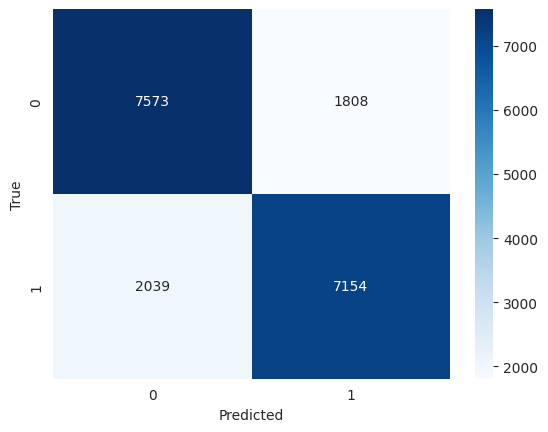

In [371]:
#Realizo la prediccion sobre el set de evaluacion
y_pred= arbol.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Anteriormente realizamos una busqueda de los hiperparametros con la función 'RandomizedSearchCV' y una grilla de parametros. Ahora deseamos utilizar la función 'cross_validate'

In [372]:
# Spits que respeten la proporción de las clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo nuevo arbol
arbolcv=DecisionTreeClassifier()

#Selecciono métrica F1-Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Hago CV
results = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

metricsCV = results['test_score']
best_performance = results['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]

In [373]:
print(metricsCV)

[0.82079343 0.82538965 0.82489212 0.83421965 0.82836163 0.82120725
 0.82562115 0.82037164 0.81799403 0.82629758]


Podemos observar que obtuvimos mejores resultados que con la grilla. Predecimos y generamos nuevamente una matriz de confusión

F1-Score: 0.822007514761138


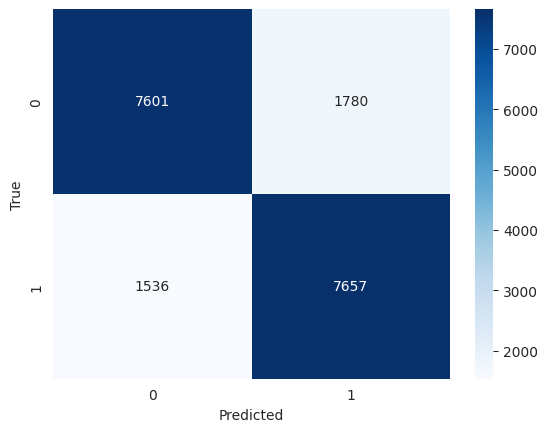

In [374]:
#Predicción sobre el set de evaluacion
y_pred= best_performance.predict(x_test)


cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) 

In [375]:
#Importancia y reglas del Árbol con mejor Performance

feat_imps = best_performance.feature_importances_

reglas = export_text(best_performance, feature_names=list(tree_testing_ds.columns))
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- lead_time <= 11.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- is_portugal <= 0.50
|   |   |   |   |   |--- market_segment_Online TA <= 0.50
|   |   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |   |--- distribution_channel_GDS <= 0.50
|   |   |   |   |   |   |   |   |--- reserved_room_type_P <= 0.50
|   |   |   |   |   |   |   |   |   |--- reserved_room_type_B <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- assigned_room_type_K <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- assigned_room_type_K >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- reserved_room_type_B >  0.50
|   |   |   |   |   |   |   |   |   |   |--- meal_SC <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 

Podemos apreciar que las reglas anteriores son muy extensas por lo que decidimos mostrar la relevancia de las primeras 10 features más importantes.

In [376]:
sorted(list(zip(tree_testing_ds.columns.to_list(), best_performance.feature_importances_)), key=lambda x: -x[1])[0:10]

[('deposit_type_Non Refund', 0.19413631685628246),
 ('lead_time', 0.14070087620406094),
 ('adr', 0.08849436664816664),
 ('market_segment_Online TA', 0.08597246482686725),
 ('arrival_date_day_of_month', 0.059332016873521264),
 ('total_of_special_requests', 0.05785479279818341),
 ('arrival_date_week_number', 0.04916260003685102),
 ('is_portugal', 0.04393296542571621),
 ('stays_in_week_nights', 0.03713474355166014),
 ('required_car_parking_spaces', 0.03208092671781719)]

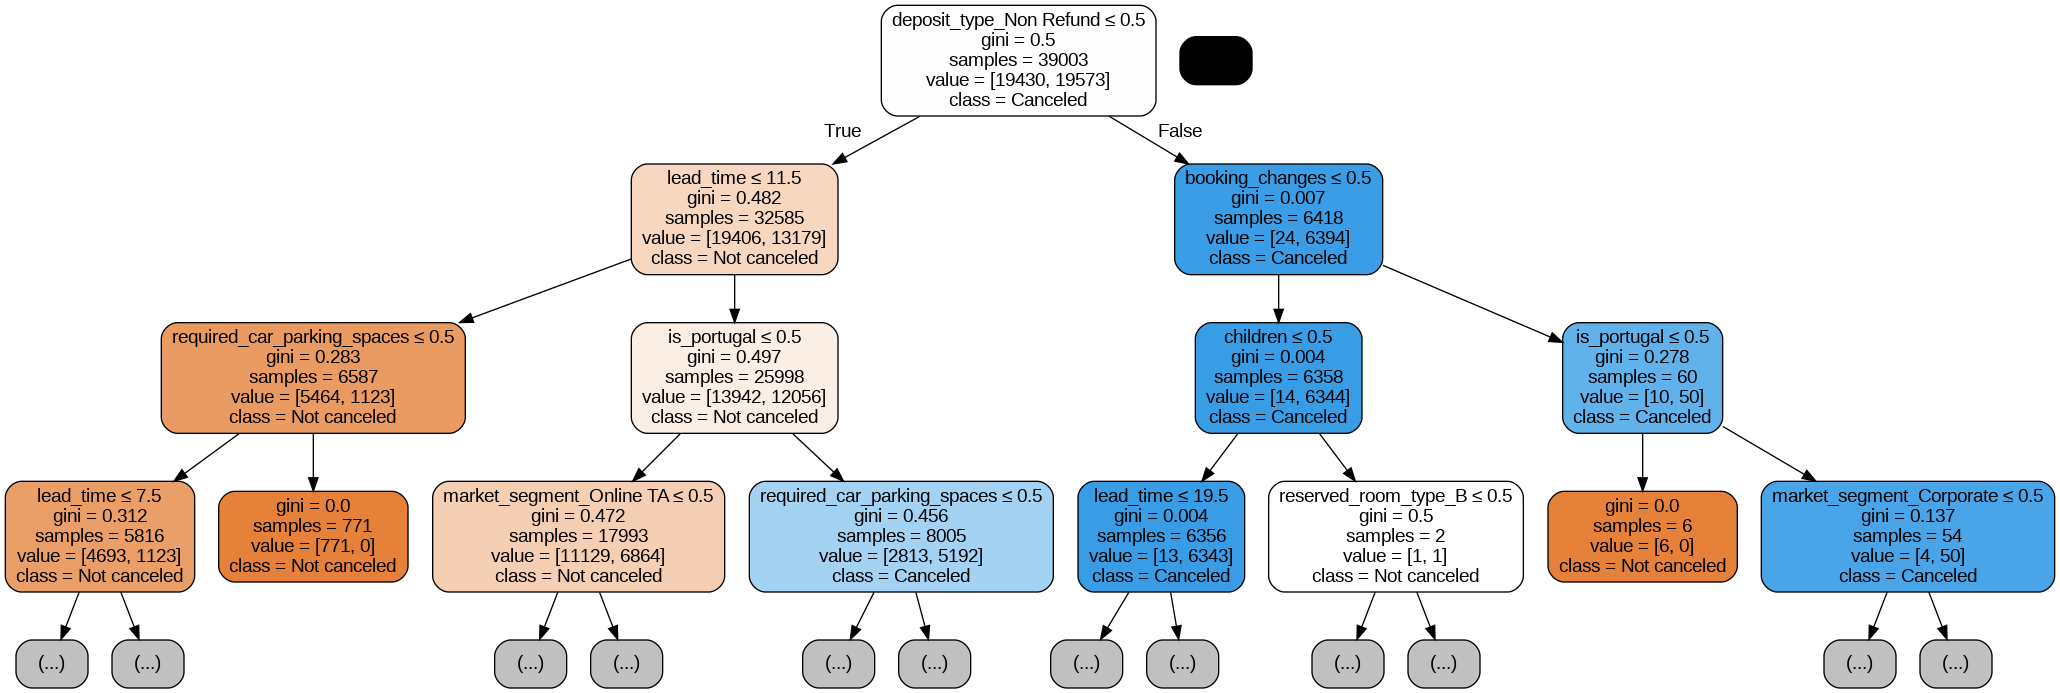

In [377]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(best_performance, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=tree_testing_ds.columns,
                class_names=["Not canceled", "Canceled"],
                max_depth = 3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Testeo arbol y guardado del modelo

In [378]:
dataset_test=pd.read_csv("https://drive.google.com/uc?export=download&id=1-5FFQZp2NmEqpBDGCD17e0QM0_AF7Ht2")

In [379]:

dataset_test["is_portugal"] = dataset_test["country"].apply(lambda x:1 if x=="PRT" else 0)
dataset_test["children"].fillna(0, inplace = True)
dataset_test["country"].fillna("NC",inplace = True)
dataset_test["agent"].fillna(-1,inplace = True)
dataset_test["company"].fillna(-1,inplace = True)
dataset_test["agent"] = dataset_test["agent"].astype(int).astype(str)
dataset_test["company"] = dataset_test["company"].astype(int).astype(str)
dataset_test["no_company"] = dataset_test["company"].apply(lambda x:1 if x=="-1" else 0)
dataset_test['month_num'] = dataset['arrival_date_month'].map(month_map)

dataset_tree_x = dataset_test.drop(["id","company","arrival_date_month","reservation_status_date","agent"],axis = "columns", inplace = False)
dataset_tree_x = pd.get_dummies(dataset_tree_x, columns=["hotel","meal","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","country"],
                           drop_first=True)
dataset_tree_x = dataset_tree_x.assign(assigned_room_type_L = pd.Series([0]*len(dataset_tree_x)).values)
dataset_tree_x = dataset_tree_x.assign(distribution_channel_Undefined = pd.Series([0]*len(dataset_tree_x)).values)
dataset_tree_x = dataset_tree_x.assign(market_segment_Undefined = pd.Series([0]*len(dataset_tree_x)).values)

dataset_tree_x = dataset_tree_x.reindex(columns=x_test.columns)
dataset_tree_x["month_num"].fillna(dataset_tree_x["month_num"].mean(), inplace = True)

In [380]:
test_pred =  best_performance.predict(dataset_tree_x)

In [381]:
dataset_tested = pd.DataFrame({'id': dataset_test['id']})
dataset_tested['is_canceled'] = test_pred

In [382]:
dataset_tested.to_csv('submit.csv', index=False)

In [383]:
import pickle

with open('modelo_arbol.pkl','wb') as file:
  pickle.dump(best_performance,file)